##TRABAJO FINAL BIGDATA INTERMEDIO 
Realizado por Grupo 2 Marcelino Madriz V.  y   Richard Douglas G.

Encontrará una sección de carga del dataset el cual en codigo se llama data, posteriormente el proceso de trato a la data (descripción, limpia, revisión) hasta llegar a los datos en limpio.  
Posterior al proceso de limpieza de los datos se presenta el proceso del EDA en el que se describe por cada caracteristica un bloxplot, histograma así como **un detalle de indicadores (min, max, media, mediana, std,quartiles)**. Un gráfico de multivariables **scatter_matrix** y correlaciones heatmap.
Seguido de esto procede las relaciones de ANOVA´s en que se pretende determinar relación o no de una variable en la influencia de otras.
Seguido de una aplicación de modelo de machine learning y finalmente conclusiones y recomendaciones en relación al trabajo realizado

##I. Dataset Asignado SAHeart

La referencia del estudio The Elements of Statistical Learning Data Mining, Inference, and Prediction, el estudio está enfocado en una muestra masculina de una edad entre 15 a 64 años en la región de Sudafrica, sobre los factores que puedan influir en daño cardiovascular

1. **CARGA DE LAS BIBLIOTECAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
sns.set()

2. **IMPORTACION DEL DATASET**

In [ ]:
data = pd.read_csv('/content/SAheart.csv', delimiter= ';')

3. **Exploración Inicial del DATASET SAHeart**

In [ ]:
data    #exploración básica del dataset para ver la composición de los datos y generalidades
           # según la referencia del estudio The Elements of Statistical Learning Data Mining, Inference, and Prediction
           # el estudio está enfocado en muestra masculina de una edad entre 15 a 64 años en la región de Sudafrica 
           # las caracteristicas del estudio son : 
           # sbp: systolic blood pressure (presion arterial) tobacco: cumulative tobacco (kg) (consumo tabaco o fumado) 
           # ldl: low density lipoprotein cholesterol (tambien conocido como colesterol dañino o malo)
           # adiposity: adiposidad o grasa localizada      famhist: family history of heart disease (Present=1, Absent=0)
           # (presenta o no historial de problemas cardiacos)
           # typea: type-A behavior Type A Behavior Pattern (TABP) type of personality concerns how people respond to stress.
           # Comportamiento de Tipo A, muetra como las personas reaccionan al estres
           # obesity: obesidad
           # alcohol: current alcohol consumption (consumo de alcochol)             age: age at onset = edad 

,Unnamed: 0,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40


El dataset está compuesto por nueve caracteristicas y 462 observaciones

In [ ]:
caracteristicas = {'sbp':'systolic blood pressure -Presión Artrial Sistólica','tobacco':'cumulative tobacco (kg) - Consumo de Tabaco Acumulado', 
                   'ldl': 'ldl: low density lipoprotein cholesterol - Colesterol Malo', 'adiposity': 'Adiposidad o Grasa Corporal', 
                   'famhist': 'family history of heart disease - Historial Familiar Enfermedad Cardiaca', 
                   'typea': 'type-A behavior - Comportamiento tipo A', 'obesity': 'Obesidad','alcohol':'Consumo de Alcohol','age':'age at onset - Edad de Inicio'}

In [ ]:
print(caracteristicas)

{'sbp': 'systolic blood pressure -Presión Artrial Sistólica', 'tobacco': 'cumulative tobacco (kg) - Consumo de Tabaco Acumulado', 'ldl': 'ldl: low density lipoprotein cholesterol - Colesterol Malo', 'adiposity': 'Adiposidad o Grasa Corporal', 'famhist': 'family history of heart disease - Historial Familiar Enfermedad Cardiaca', 'typea': 'type-A behavior - Comportamiento tipo A', 'obesity': 'Obesidad', 'alcohol': 'Consumo de Alcohol', 'age': 'age at onset - Edad de Inicio'}


Aplicación de un Diccionario

In [ ]:
print(caracteristicas["sbp"])

systolic blood pressure -Presión Artrial Sistólica


In [ ]:
print(caracteristicas["tobacco"])

cumulative tobacco (kg) - Consumo de Tabaco Acumulado


In [ ]:
print(caracteristicas["ldl"])

ldl: low density lipoprotein cholesterol - Colesterol Malo


In [ ]:
print(caracteristicas["famhist"])

family history of heart disease - Historial Familiar Enfermedad Cardiaca


In [ ]:
data.tail()

,Unnamed: 0,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40
461,132,0.00,4.82,33.41,Present,62,14.70,0.00,46


4. **Revisión para determinar si existen datos nulos**

In [ ]:
data.isnull().sum()

Unnamed: 0    0
tobacco       2
ldl           0
adiposity     2
famhist       0
typea         3
obesity       1
alcohol       0
age           0
dtype: int64

In [ ]:
data.size  #Para conocer el tamaño del dataset

4158

##II. Aplicar los visto para verificar el dataser
**A. Asegurarse de la Fiabilidad de los datos**

Se requeire realizar limpia de dato, cambiar un encabezado que está erroneo e imputar datos

**B. Aplicar procedimientos de limpiar e Imputación de datos**

##1.limpieza de las caracteristicas, verificar datos nulos o incorrectos

**A.Limpieza de la caracteristica tobacco**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

In [ ]:
data['tobacco'].isnull().sum()

2

In [ ]:
data['tobacco']

0      12.00
1       0.01
2       0.08
3       7.50
4      13.60
       ...  
457     0.40
458     4.20
459     3.00
460     5.40
461     0.00
Name: tobacco, Length: 462, dtype: object

In [ ]:
data['tobacco'] = data['tobacco'].astype('float')

ValueError: ignored

In [ ]:
data['tobacco'] = data['tobacco'].str.replace('f', 'NaN')

In [ ]:
data['tobacco'].isnull().sum()

2

In [ ]:
data['tobacco'].plot.hist();

TypeError: ignored

In [ ]:
data['tobacco'] = data['tobacco'].astype('float')

ValueError: ignored

In [ ]:
data['tobacco'] = data['tobacco'].str.replace('NaNg', 'NaN')

In [ ]:
data['tobacco'] = data['tobacco'].astype('float')

Se genera el histograma de la caracteristica tobacco para observar el comportamiento de la distribucion e imputar según sea necesario

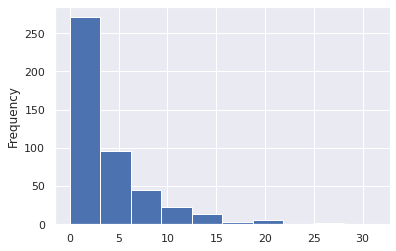

In [ ]:
data['tobacco'].plot.hist();   # se observa que la caracteristica tobbacco presenta una distribución con asimetría positiva

In [ ]:
median1 = data['tobacco'].median()  # se imputa por la media por tener una distribucion asimetrica positiva

In [ ]:
print(median1)

2.0


Se imputa la caracteristica tobacco por la mediana 

In [ ]:
data['tobacco'].fillna(median1, inplace = True)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     2
famhist       0
typea         3
obesity       1
alcohol       0
age           0
dtype: int64

**B.Limpieza de la caracteristica ldl**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Se procede a la revisión de la caracteristica **ldl**

In [ ]:
data['ldl']

0       5.73
1       4.41
2       3.48
3       6.41
4       3.50
       ...  
457     5.98
458     4.41
459     1.59
460    11.61
461     4.82
Name: ldl, Length: 462, dtype: float64

Histograma de la caracteristica de  **ldl** para observar la distribución de los datos

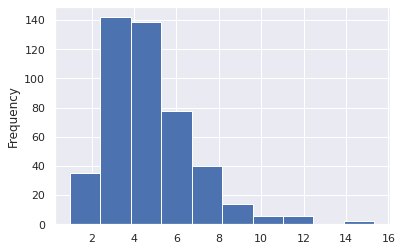

In [ ]:
data['ldl'].plot.hist();    # se observa que la caracteristica ldl  presenta una distribución con asimetría positiva

In [ ]:
100 * data['ldl'].value_counts() / len(data['ldl'])

3.95    1.082251
4.37    1.082251
3.57    1.082251
2.40    0.865801
3.58    0.865801
          ...   
3.47    0.216450
2.53    0.216450
6.13    0.216450
7.39    0.216450
3.50    0.216450
Name: ldl, Length: 329, dtype: float64

Observar la composición de los datos de ldl para determinar si existe algún datos incorrecto

In [ ]:
data.groupby('ldl').size()

ldl
0.98     1
1.07     1
1.43     1
1.55     1
1.59     1
        ..
11.61    1
11.89    1
12.42    1
14.16    1
15.33    1
Length: 329, dtype: int64

Al parecer la caracteristica LDL Colesterol se encuentra bien en datos y sin nulos

**C. Limpieza de la caracteristica adiposity**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Se procede a la revisión de la caracteristica **adiposity**


In [ ]:
data['adiposity']

0      23.11
1      28.61
2      32.28
3      38.03
4      27.78
       ...  
457    31.72
458    32.10
459    15.23
460    30.79
461    33.41
Name: adiposity, Length: 462, dtype: object

In [ ]:
data['adiposity'].isnull().sum()

2

In [ ]:
100 * data['adiposity'].value_counts() / len(data['adiposity'])

27.55    0.649351
30.79    0.649351
29.30    0.649351
20.47    0.432900
17.33    0.432900
           ...   
34.27    0.216450
42.49    0.216450
14.99    0.216450
28.82    0.216450
26.26    0.216450
Name: adiposity, Length: 407, dtype: float64

In [ ]:
data['adiposity'] = data['adiposity'].astype('float')

ValueError: ignored

Se procede a la limpiar la caracteristica **adiposity**


In [ ]:
data['adiposity'] = data['adiposity'].str.replace('f', 'NaN')

In [ ]:
data['adiposity'] = data['adiposity'].astype('float')

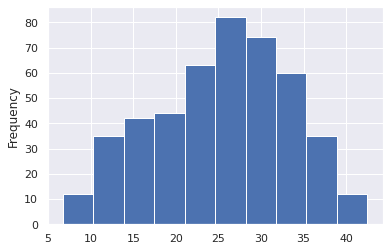

In [ ]:
data['adiposity'].plot.hist();   #  # se observa que la caracteristica tobbacco presenta una distribución con una pequeña inclinacion de asimetría negativa, se imputa por la mediana

In [ ]:
mediana4 = data['adiposity'].median()

In [ ]:
print(mediana4)

26.13


Se procede a imputar la caracteristica **adiposity** por la 


In [ ]:
data['adiposity'].fillna(mediana4, inplace = True)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         3
obesity       1
alcohol       0
age           0
dtype: int64

**D. Limpieza de la caracteristica famhist** (Historial Familiar de Enfermedad Cardiacos)

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Se procede a la revisión de la caracteristica **famhist / Historial Familiar de Enfermedad Cardiaca**


In [ ]:
data['famhist']  # esta variable debe ser Present, Absent,  presenta o no presenta

0      Present
1       Absent
2      Present
3      Present
4      Present
        ...   
457     Absent
458     Absent
459     Absent
460     Absent
461    Present
Name: famhist, Length: 462, dtype: object

In [ ]:
data['famhist'].mode()

0    Absent
dtype: object

Se procede a la revisión de la caracteristica **famhist / Historial Familiar de Enfermedad Cardiaca**   se observan unos datos que no corresponden

In [ ]:
data.groupby('famhist').size()

famhist
0            3
Absent     267
Present    189
fg           1
gf           1
ggg          1
dtype: int64

In [ ]:
100 * data['famhist'].value_counts() / len(data['famhist'])  #vimos el peso de cada uno de los datos, los que están mal son minimos, vamos a imputar por la moda

Absent     57.792208
Present    40.909091
0           0.649351
ggg         0.216450
fg          0.216450
gf          0.216450
Name: famhist, dtype: float64

In [ ]:
data['famhist'] = data['famhist'].str.replace('0', 'NaN')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     267
NaN          3
Present    189
fg           1
gf           1
ggg          1
dtype: int64

Limpiar los datos incorrectos en la caracteristica famhist

In [ ]:
data['famhist'] = data['famhist'].str.replace('gf', 'NaN')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     267
NaN          4
Present    189
fg           1
ggg          1
dtype: int64

In [ ]:
data['famhist'] = data['famhist'].str.replace('ggg', 'NaN')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     267
NaN          5
Present    189
fg           1
dtype: int64

In [ ]:
data['famhist'] = data['famhist'].str.replace('fg', 'NaN')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     267
NaN          6
Present    189
dtype: int64

In [ ]:
mode = data['famhist'].mode()

In [ ]:
print(mode)

0    Absent
dtype: object


Imputación de la caracteristica famhist por la moda

In [ ]:
data['famhist'].fillna("Absent", inplace = True)

In [ ]:
data['famhist'].isnull().sum()

0

In [ ]:
data['famhist']=data['famhist'].astype('object')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     267
NaN          6
Present    189
dtype: int64

In [ ]:
data['famhist'].fillna("Absent", inplace = True)

In [ ]:
data['famhist'] = data['famhist'].str.replace('NaN', 'Absent')

In [ ]:
data.groupby('famhist').size()

famhist
Absent     273
Present    189
dtype: int64

In [ ]:
data.isnull().sum()   #se verifica que no queden nulos en la caracteristica famhist

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         3
obesity       1
alcohol       0
age           0
dtype: int64

**E. Limpieza de la caracteristica typea**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Inspección de la caracteristica **Type A** / Conducta Tipo A

In [ ]:
data['typea']

0      49
1      55
2      52
3      51
4      60
       ..
457    64
458    52
459    40
460    64
461    62
Name: typea, Length: 462, dtype: object

In [ ]:
data['typea'].isnull().sum()

3

Crear un histograma de la caracteristica **typea** / Conducta Tipo A para ver la distribución de los datos

In [ ]:
data['typea'].plot.hist();

TypeError: ignored

In [ ]:
data['typea'] = data['typea'].astype('float')    # se observa que la caracteristica typea contiene datos erroneos

ValueError: ignored

In [ ]:
100 * data['typea'].value_counts() / len(data['typea'])

52     5.411255
57     4.978355
50     4.545455
54     4.545455
49     4.329004
60     3.896104
56     3.896104
55     3.679654
61     3.679654
47     3.679654
45     3.463203
51     3.246753
58     3.030303
48     3.030303
53     3.030303
42     2.813853
59     2.813853
46     2.813853
65     2.380952
64     2.380952
63     2.164502
62     1.948052
66     1.948052
41     1.948052
43     1.515152
69     1.515152
35     1.298701
67     1.298701
68     1.298701
70     1.082251
39     1.082251
44     1.082251
36     1.082251
33     0.865801
38     0.865801
72     0.865801
37     0.649351
71     0.432900
30     0.432900
31     0.432900
73     0.432900
74     0.432900
40     0.432900
78     0.216450
28     0.216450
25     0.216450
fg     0.216450
29     0.216450
13     0.216450
200    0.216450
0      0.216450
20     0.216450
34     0.216450
32     0.216450
75     0.216450
Name: typea, dtype: float64

In [ ]:
data.groupby('typea').size()

typea
0       1
13      1
20      1
200     1
25      1
28      1
29      1
30      2
31      2
32      1
33      4
34      1
35      6
36      5
37      3
38      4
39      5
40      2
41      9
42     13
43      7
44      5
45     16
46     13
47     17
48     14
49     20
50     21
51     15
52     25
53     14
54     21
55     17
56     18
57     23
58     14
59     13
60     18
61     17
62      9
63     10
64     11
65     11
66      9
67      6
68      6
69      7
70      5
71      2
72      4
73      2
74      2
75      1
78      1
fg      1
dtype: int64

Corregir el dato incorrecto en la caracteristica typea

In [ ]:
data['typea'] = data['typea'].str.replace('fg', 'NaN')

In [ ]:
data['typea'] = data['typea'].astype('float')

In [ ]:
data.isnull().sum()

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         4
obesity       1
alcohol       0
age           0
dtype: int64

Crear Histograma de la caracteristica typea / Conducta del Tipo A para observar la dsitribución de los datos y asi imputar los datos según corresponde

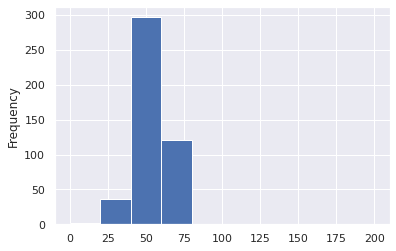

In [ ]:
data['typea'].plot.hist();   # presenta una simetria negativa 

In [ ]:
median2 = data['typea'].median()

In [ ]:
print(median2)

53.0


Se imputa la caracteristica typea por la mediana, esto por el tipo de distribución de los datos 

In [ ]:
data['typea'].fillna(median2, inplace = True)

In [ ]:
data.isnull().sum()   # se revisa que la caracteristica typea no contenga datos nulos 

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         0
obesity       1
alcohol       0
age           0
dtype: int64

**F. Limpieza de la caracteristica obesity**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Revisión de la caracteristica **obesity** / obesidad

In [ ]:
data['obesity']

0      25.30
1      28.87
2      29.14
3      31.99
4      25.99
       ...  
457    28.45
458    28.61
459    20.09
460    27.35
461    14.70
Name: obesity, Length: 462, dtype: object

In [ ]:
data['obesity'] = data['obesity'].astype('float')

ValueError: ignored

In [ ]:
data.groupby('obesity').size()   # se observan datos incorectos en obesity

obesity
14.70    1
17.75    1
17.81    1
17.89    1
18.36    1
        ..
40.34    1
41.76    1
45.72    1
46.58    1
f        1
Length: 399, dtype: int64

In [ ]:
100 * data['obesity'].value_counts() / len(data['obesity']) 

24.86    0.865801
26.09    0.865801
24.98    0.649351
22.51    0.649351
28.40    0.649351
           ...   
27.23    0.216450
20.96    0.216450
20.29    0.216450
27.80    0.216450
22.76    0.216450
Name: obesity, Length: 399, dtype: float64

In [ ]:
data['obesity'] = data['obesity'].str.replace('f', 'NaN')

In [ ]:
data['obesity'] = data['obesity'].astype('float')

In [ ]:
data.isnull().sum()

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         0
obesity       2
alcohol       0
age           0
dtype: int64

Crear un histograma de la caracteristica obesity para determinar el comportamiento de los datos y posterios imputar

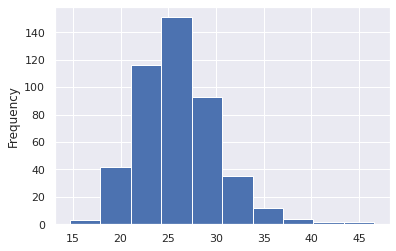

In [ ]:
data['obesity'].plot.hist();  # según el histograma se aprecia que la caracteristica obesity presenta una asimetría positiva

In [ ]:
median3 = data['obesity'].median()

In [ ]:
print(median3)

25.83


Se imputa la caracteristica obesity por la mediana

In [ ]:
data['obesity'].fillna(median3, inplace = True)   # se imputa por la mediana

In [ ]:
data.isnull().sum()    # se verifica que no queden datos nulos en la caracteristica obesity

Unnamed: 0    0
tobacco       0
ldl           0
adiposity     0
famhist       0
typea         0
obesity       0
alcohol       0
age           0
dtype: int64

**G. Limpieza de la caracteristica alcohol**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Inspeccionar la caracteristica **alcohol**

In [ ]:
data['alcohol']

0      97.20
1       2.06
2       3.81
3      24.26
4      57.34
       ...  
457     0.00
458    18.72
459    26.64
460    23.97
461     0.00
Name: alcohol, Length: 462, dtype: float64

In [ ]:
data.groupby('alcohol').size()

alcohol
0.00      110
0.19        1
0.26        1
0.37        2
0.51        8
         ... 
109.80      1
120.03      1
144.00      1
145.29      1
147.19      1
Length: 249, dtype: int64

Crear Histograma de la caracteristica alcohol

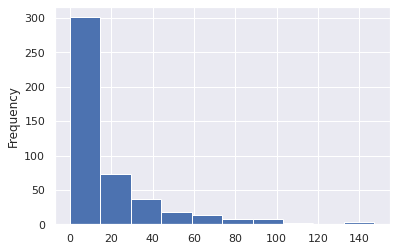

In [ ]:
data['alcohol'].plot.hist();    #según el histograma se aprecia que existe una asimetría totalmente positiva

In [ ]:
data['alcohol'].isnull().sum()   # la caracteristica alcohol no posee datos nulos, no requiere ser imputado

0

**H. Limpieza de la caracteristica age**

Se inicia por una inspección de la caracteristica y verificar los datos nulos o erroneos que contenga

Inspeccionar la cracteristica **age**

In [ ]:
data['age']

0      52
1      63
2      46
3      58
4      49
       ..
457    58
458    52
459    55
460    40
461    46
Name: age, Length: 462, dtype: int64

In [ ]:
data.groupby('age').size()

age
15     3
16    20
17    17
18     8
19     2
20     6
21     3
23     2
24     6
25     4
26     5
27    11
28     7
29     7
30     7
31     9
32    11
33     9
34     6
35     1
36     3
37     6
38    13
39    10
40    12
41    10
42    13
43     8
44     8
45    14
46    11
47     3
48    13
49    14
50     8
51     8
52    10
53    14
54    10
55    16
56     9
57     8
58    17
59    16
60    15
61    16
62    12
63     8
64    13
dtype: int64

Se crea el histograma de la caracteristica age

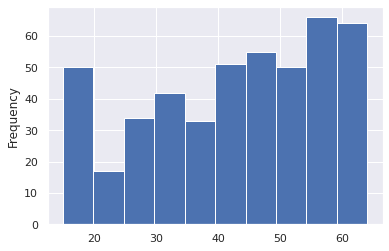

In [ ]:
data['age'].plot.hist();  # Este histograma indica un comportamiento multimodal

In [ ]:
data['age'].isnull().sum()

0

Al parecer la carcteristia **age** se encuentra bien en los datos

Corregir el encabezado de una de las caracteristicas la cual debe corresponderle **sbp**  systolic blood pressure  / presion arterial

In [ ]:
data.head(5)

,Unnamed: 0,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60.0,25.99,57.34,49


In [ ]:
data.columns  # se bsuca corregir el dato vacio en el la columna

Index(['Unnamed: 0', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age'],
      dtype='object')

In [ ]:
data= data.rename(columns={'Unnamed: 0':'sbp'})  # se renombra la columna Unnamed: 0 a un nombre acorde a la descripción de la caracteristica 
                                                 #systolic blood pressure  sbp

In [ ]:
data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')

In [ ]:
data.head()   #se aprecia el dataset con los encabezados correctos

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60.0,25.99,57.34,49


Revisión de la Caracteristica sbp

In [ ]:
data.groupby('sbp').size()

sbp
101    1
102    1
103    1
106    3
108    7
      ..
206    2
208    3
214    1
216    1
218    1
Length: 62, dtype: int64

In [ ]:
data['sbp'].isnull().sum()

0

In [ ]:
100 * data['sbp'].value_counts() / len(data['sbp']) 

134    6.277056
136    6.277056
128    5.411255
132    5.194805
124    4.545455
         ...   
188    0.216450
198    0.216450
200    0.216450
214    0.216450
101    0.216450
Name: sbp, Length: 62, dtype: float64

Según lo observado la caracteristica sbp se encuentra bien

#D. Análisis Exploratorio de Datos EDA

#Detalle general de las caracteristicas del dataset SAheart 
           Según la referencia del estudio The Elements of Statistical Learning Data Mining, Inference, and Prediction
           el estudio está enfocado en muestra masculina de una edad entre 15 a 64 años en la región de Sudafrica 
           las caracteristicas del estudio son : 
           las caracteristicas del estudio son : 
           sbp: systolic blood pressure (presion arterial) tobacco: cumulative tobacco (kg) (consumo tabaco o fumado) 
           ldl: low density lipoprotein cholesterol (tambien conocido como colesterol dañino o malo)
           adiposity: adiposidad o grasa localizada      famhist: family history of heart disease (Present=1, Absent=0) 
           (presenta o no historial de problemas cardiacos)
           type-A behavior: Type A Behavior Pattern (TABP) type of personality concerns how people respond to stress.
           # Comportamiento de Tipo A, muetra como las personas reaccionan al estres     obesity: obesidad 
           alcohol: current alcohol consumption (consumo de alcochol)             age: age at onset = edad de inicio

Proceder a realizar gráficos y la interpretación de los mismos

Inicialmente un agrupado de HISTOGRAMAS DE LAS CARACTERISTICAS

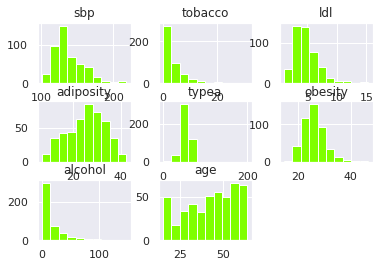

In [ ]:
data.hist(color = 'chartreuse')
plt.show()

In [ ]:
data['famhist'].plot(kind='box')
plt.show()

TypeError: ignored

Se debe convertir la caracteristica famhist a  numerica

In [ ]:
obj_df = data.select_dtypes(include=['object']).copy()

In [ ]:
print(obj_df.columns)

Index(['famhist'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_encoder = LabelEncoder()

In [ ]:
for col in obj_df.columns:
  data[col] = lb_encoder.fit_transform(data[col])

In [ ]:
data.dtypes


sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea        float64
obesity      float64
alcohol      float64
age            int64
dtype: object

In [ ]:
data.groupby('famhist').size()

famhist
0    273
1    189
dtype: int64

Se vuelve a generar los Histogramas de las caracteristicas

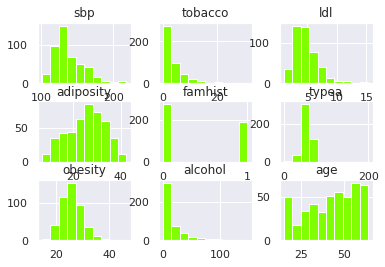

In [ ]:
data.hist(color = 'chartreuse')
plt.show()                       # Se pueden ver las dsitribuciones de los datos de cada una de las caracteristicas
                                 # Sin embargo se detallan de forma cada una de forma individual por cada caracteristica en el proceso
                                 # EDA

Se aprecia que ya se pueden generar los histogramas de todas las caracteristicas, seguidamentes se procede a detallar en cada carateristica **un boxplot, histograma, mediana, media, moda, quartiles, entre otros**

#Generar los Box plot, Histogramas, Mínimos , Maximos por cada caracteristica

Se generan un Blox Plot en grupo

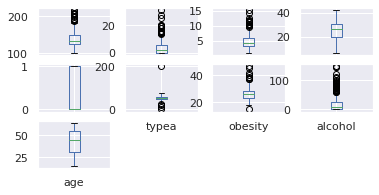

In [ ]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()                        # Se pueden observar los boxplot por cada caracteristica, se observan que algunas caracteristicas preentan
                                  # datos atipicos, sin embargo se detalla cada una en el proceso
                                  # de análisis EDA por caracteristica.

##Se procede a realizar el detalle de cada caracteristica según lo solicitado

Análisis de la Caracteristica sbp - en el proceso del EDA 

Blox plot caracteristica sbp   systolic blood pressure -Presión Artrial Sistólica

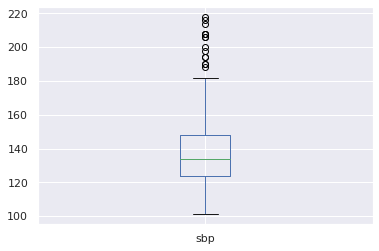

In [ ]:
data['sbp'].plot(kind='box')             # según este gráfico la mediana es de alrededor de 134, el primer quartil (25%) corresponde a 124 
plt.show()                               # y el tercer quartil corresponde a 148, se observan valores atipicos

In [ ]:
data['sbp'].quantile(0.25)     # primer quartil indica que un 25% de las personas tienen una presion arterial sbp  menor o igual a 124, mientras que el 75% restante tienen
                               # una presion arterial sbp mayor a 124

124.0

In [ ]:
data['sbp'].quantile(0.5)     # el 50% de los datos de la caracteristica se encuentra son menores o igual a 134

134.0

In [ ]:
data['sbp'].quantile(0.75)    # el tercer quartil (0.75) indica que el 75 % de las personas en el estudio presenta una sbp menor igual a 148 

148.0

Histograma de sbp

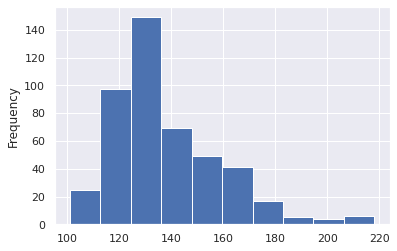

In [ ]:
data['sbp'].plot.hist();     # Presenta una distribución asimetrica positiva 

Datos analisis de la caracteristica sbp

In [ ]:
data['sbp'].min() # el valor más bajo de la caracteristica corresponde a 101

101

In [ ]:
data['sbp'].max()   # el valor mas alto de la caracteristica corresponde a 218

218

In [ ]:
data['sbp'].mode()    # la caracteristica sbp presenta dos modas, lo que quiere decir, hay dos numeros que se repiten mucho

0    134
1    136
dtype: int64

In [ ]:
data['sbp'].median()   # la mediana de la caracteristica corresponde a 134 es que el 50% de los datos son menores o iguales a 134 o el 50% 
                       # de los datos son mayores o iguales a 134

134.0

In [ ]:
data['sbp'].mean()    # la media de la caracteristica corresponde a 138.32, lo que indica es que en promedio la presion sanguinea sbp corresponde a 138

138.32683982683983

In [ ]:
data['sbp'].std()     # la desviación estandar de la caracteristica sbp es de 20.49  lo que quiere decir que los datos se alejan del promedio en 20.49

20.496317175467627

Análisis de la Caracteristica tobacco - en el proceso del EDA 

Caracteristica **tobacco** - Consumo de Tabaco Acumulado'

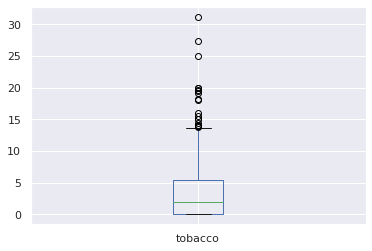

In [ ]:
data['tobacco'].plot(kind='box')    # este gprafico nos muestra que existen valores atipicos, según este gráfico la mediana ronda el valor de 2
plt.show()

In [ ]:
data['tobacco'].quantile(0.25) # primer quartil indica que un 25% de las personas presentan un fumado que es menor o igual a 0.05 kg,
                              #  mientras que el 75% restante tienen un consumo mayor a 0.05

0.052500000000000005

In [ ]:
data['tobacco'].quantile(0.5) # el 50% del consumo de tabaco por parte de las personas del estudio es menor o igual a 2 (kg) y el restante
                              # 50% presenta un consumo mayor o igual a 2 (kg)

2.0

In [ ]:
data['tobacco'].quantile(0.75) # el tercer quartil (0.75) indica que el 75 % de las personas en el estudio presenta un consumo de tabaco menor igual a 5.47 (kg) 

5.475

Histograma tobacco

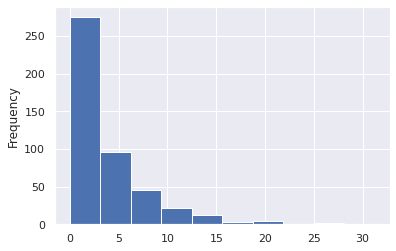

In [ ]:
data['tobacco'].plot.hist();     # Presenta una distribución asimetrica positiva 

Datos analisis de la caracteristica tobacco

In [ ]:
data['tobacco'].min() # el valor más bajo de la caracteristica corresponde a 0

0.0

In [ ]:
data['tobacco'].max()  # el valor maximo (mas alto) de la caracteristica de consumo de tabaco corresponde a 31.2

31.2

In [ ]:
data['tobacco'].mode() # el valor que más se repite corresponde a 0

0    0.0
dtype: float64

In [ ]:
data['tobacco'].median() #  la mediana de la caracteristica de consumo de tabaco corresponde a 2 es que el 50% de los datos 
                         #  son menores o iguales a 2 o el 50% de los datos son mayores o iguales a 2

2.0

In [ ]:
data['tobacco'].mean()  # la media de la caracteristica tobbaco corresponde a 3.62, lo que indica es que en promedio 
                        # el consumo de tabaco corresponde a 3.62

3.6257575757575737

In [ ]:
data['tobacco'].std()  # la desviación estandar de la caracteristica tobacco es de 4.59  lo que quiere decir que los datos se 
                       # alejan del promedio en 4.59

4.5919963108627595

**Análisis de la Caracteristica ldl - en el proceso del EDA**

*Caracteristica* **ldl** low density lipoprotein cholesterol = Conocido tambien como Colesterol Dañino o Malo

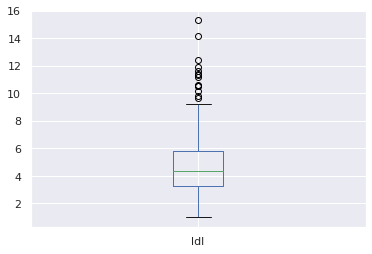

In [ ]:
data['ldl'].plot(kind='box')    # este gprafico nos muestra que existen valores atipicos, según este gráfico la mediana ronda el valor de 4.3
plt.show()

In [ ]:
data['ldl'].quantile(0.25) # primer quartil indica que un 25% de las personas presentan adiposity menor o igual a 19.77, 
                                 # mientras que el 75% restante tienen un nivel de adiposity de mayor o igual a 19.77

3.2824999999999998

In [ ]:
data['ldl'].quantile(0.50) # el 50% de las personas presentan un nivel de adiposity menor o igual a 26.13 y el restante
                                 # 50% presenta un nivel de adiposity mayor o igual a 26.13

4.34

In [ ]:
data['ldl'].quantile(0.75) # el tercer quartil (0.75) indica que el 75 % de las personas en el estudio 
                                  # presenta un nivel de adiposity menor igual a 31.02

5.789999999999999

Histograma de la caracteristica **ldl**

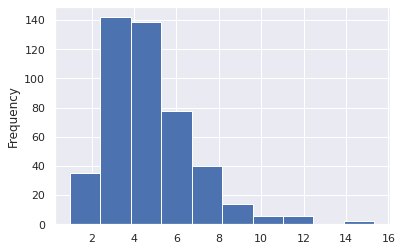

In [ ]:
data['ldl'].plot.hist();    # presenta una distribución positiva

Datos analisis de la caracteristica **ldl**

In [ ]:
data['ldl'].min() # el valor más bajo que se presenta corresponde a  6.74 en ldl

0.98

In [ ]:
data['ldl'].max() # el valor máximo que presenta la caracteristica es de 15.33

15.33

In [ ]:
data['ldl'].mode()  # Una caracteristica multimodal, lo que quiere decir que los datos más frecuentes
                    # corresponden a 3.57 , 3.95 y 4.37 en lo que corresponde a ldl 

0    3.57
1    3.95
2    4.37
dtype: float64

In [ ]:
data['ldl'].median()  #la mediana de la caracteristica corresponde a 4.34 es que el 50% de los datos son menores o iguales a 4.34

4.34

In [ ]:
data['ldl'].mean()  # la media de la caracteristica corresponde a 4.74, lo que indica es que en promedio de la caracteristica es de 4.74

4.7403246753246835

In [ ]:
data['ldl'].std()  # la desviación estandar de la caracteristica ldl es de 2.07  lo que quiere decir que los datos se alejan del promedio en 2.07

2.0709091610593258

Análisis de la Caracteristica adiposity - en el proceso del EDA 

Caracteristica **adiposity** = tipo de grasa corporal o adiposidad localizada - EDA  

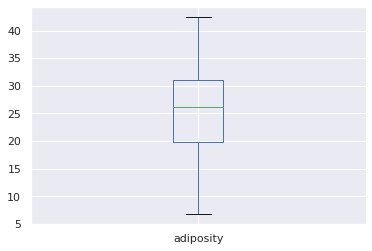

In [ ]:
data['adiposity'].plot(kind='box')     # El gráfico no muestra datos o valores atípicos, el valor mínimo ronda a 6 y el valor maximo alrrededor de 42
plt.show()                             # el valor de la mediana según el gráfico ronda los 26

In [ ]:
data['adiposity'].quantile(0.25) # primer quartil indica que un 25% de las personas presentan adiposity menor o igual a 19.77, 
                                 # mientras que el 75% restante tienen un nivel de adiposity de mayor o igual a 19.77


19.775

In [ ]:
data['adiposity'].quantile(0.50) # el 50% de las personas presentan un nivel de adiposity menor o igual a 26.13 y el restante
                                 # 50% presenta un nivel de adiposity mayor o igual a 26.13

26.13

In [ ]:
data['adiposity'].quantile(0.75) # el tercer quartil (0.75) indica que el 75 % de las personas en el estudio 
                                  # presenta un nivel de adiposity menor igual a 31.02

31.025000000000002

Histograma de la caracteristica **adiposity**

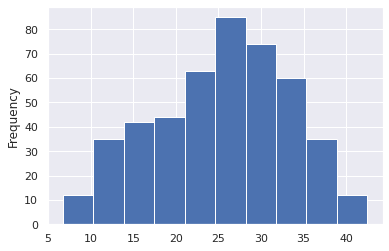

In [ ]:
data['adiposity'].plot.hist();    # presenta una distribución levemente negativa

Datos analisis de la caracteristica adiposity

In [ ]:
data['adiposity'].min() # el valor más bajo que se presenta corresponde a  6.74 en adiposity

6.74

In [ ]:
data['adiposity'].max() # el valor mas alto en adiposity corresponde a 42.49

42.49

In [ ]:
data['adiposity'].mode() # el valor que más se repiste en esta caracteristica corresponde a 26.13

0    26.13
dtype: float64

In [ ]:
data['adiposity'].median() #la mediana de la caracteristica corresponde a 26.13, lo que indica que el 50% 
                           # de los personas presentan adipositu menor o igual a 26.12 o el 50% restante mayor o gual a 26.13

26.13

In [ ]:
data['adiposity'].mean()  # la media de la caracteristica corresponde a 25.4, 
                           #lo que indica es que en promedio la adiposity adiposidad corporal en las personas en estudio es de 25.40

25.4077922077922

In [ ]:
data['adiposity'].std() # la desviación estandar de la caracteristica adiposity  es de 7.77
                        # lo que quiere decir que los datos se alejan del promedio en 7.77

7.772587844225892

Análisis de la Caracteristica famhist - en el proceso del EDA 

Caracteristica **famhist** Histororial Familiar Problema Cardaico- EDA

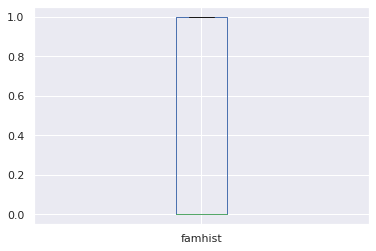

In [ ]:
data['famhist'].plot(kind='box')   # esta caracteristica corresponde a un booleano, no es la mejor forma de representación
plt.show()                         # lo que indica es si la persona presenta o no presenta historial familiar de enfermedad cardiaca
                                   # sin embargo la caracteristica se aprecia de mejor forma en combinación con las demás caracteristicas
                                   # con respecto a las persona que presentan historial familiar de enfermedad cardica corresponden a 
                                   # 189 y los que no presentan corresponden a 273.
                                   # Al correponder a un sí presenta o un no presenta se convirtío a numérica, en donde 0 corresponde
                                   # a no presenta, y un 1 a sí presenta.

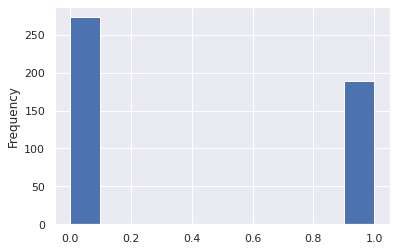

In [ ]:
data['famhist'].plot.hist();             # esta caracteristica corresponde a un booleano, el gráfico no nos brinda mucha información

In [ ]:
data['famhist'].mode()    # esta corresponde a una variable que anteriormente es cualitativa , en este caso el 0 significa o corresponde a no presenta historial famhist

0    0
dtype: int64

In [ ]:
data.groupby('famhist').size()

famhist
0    273
1    189
dtype: int64

Análisis de la Caracteristica Typea - en el proceso del EDA 

Caracteristica **typea** Comportamiento del Tipo A

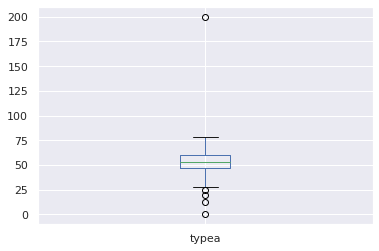

In [ ]:
data['typea'].plot(kind='box')  # el gráfico nos muestra la existencia de valores atípicos, el valor de la mediana ronda 53
plt.show()

In [ ]:
data['typea'].quantile(0.25)   #primer quartil indica que un 25% de los valores de la caracteristica son menor o igual a 47

47.0

In [ ]:
data['typea'].quantile(0.50)  # el 50% del los valores de la caracteristica son menor o igual a 53

53.0

In [ ]:
data['typea'].quantile(0.75) # el 75% del los valores de la caracteristica son menor o igual a 60

60.0

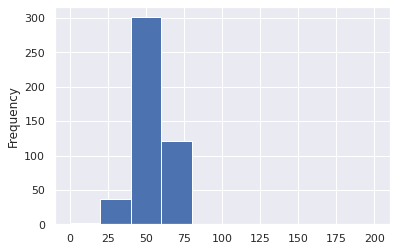

In [ ]:
data['typea'].plot.hist();   # presenta una distribución parecido o similar a una distribución normal, por los
                             # resultados de la moda, media y mediana, con una pequeña inclinación negativa

Datos analisis de la caracteristica typea

In [ ]:
data['typea'].min()   # el valor mínimo es de cero 0

0.0

In [ ]:
data['typea'].max()  # el valor más alto que aparece corresponde a 200

200.0

In [ ]:
data['typea'].mode() # el valor que aparece más veces es 52

0    52.0
dtype: float64

In [ ]:
data['typea'].median() #la mediana de la caracteristica corresponde a 53 es que el 50% de los datos son menores o iguales a 53 

53.0

In [ ]:
data['typea'].mean()   # el valor promedio de la caracteristica corresponde a 53

53.33766233766234

In [ ]:
data['typea'].std()   # la desviación estandar indica que los valores se alejan del promedio en 12.07

12.078137208528318

Análisis de la Caracteristica **Obesity** - en el proceso del EDA 

Caracteristica **obesity** - EDA

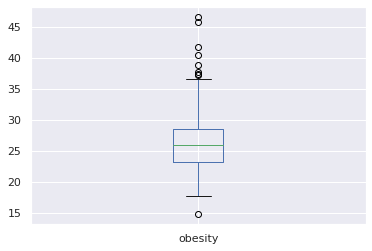

In [ ]:
data['obesity'].plot(kind='box')    # El gráfico muestra que existen valores atípicos, el valor de la mediana alrededor de 26
plt.show()

In [ ]:
data['obesity'].quantile(0.25)   #primer quartil indica que un 25% de los valores de la caracteristica son menor o igual a 23.11

23.1125

In [ ]:
data['obesity'].quantile(0.50)  # el 50% del los valores de la caracteristica son menor o igual a 525.833

25.83

In [ ]:
data['obesity'].quantile(0.75)  # el 75% del los valores de la caracteristica son menor o igual a 28.49

28.4975

Histograma de obesity

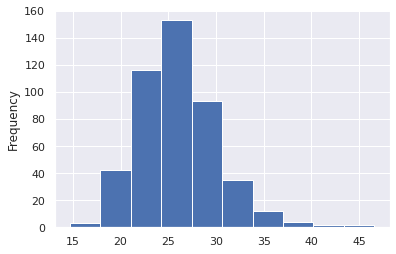

In [ ]:
data['obesity'].plot.hist();   # La dsitribución de los datos se observa un comportamiento multidomal

Datos analisis de la caracteristica obesity

In [ ]:
data['obesity'].min()  # el valor mínimo presente corresponde a 14.7

14.7

In [ ]:
data['obesity'].max()  # el valor máximo presente es de 46.58

46.58

In [ ]:
data['obesity'].mode()  # presencia de dos modas, 24.86 y 26.09, los cuales son los valores que más se repiten

0    24.86
1    26.09
dtype: float64

In [ ]:
data['obesity'].median()  #la mediana de la caracteristica obesity corresponde a 25.83 es que el 50% de los datos son menores o iguales a 25.83 

25.83

In [ ]:
data['obesity'].mean()  # el valor promedio de la caractersitica obesity corresponde a 26.06

26.064025974025995

In [ ]:
data['obesity'].std()  # la desviación estandar de la caracteristica es de 4.20 quiere decir que los datos se alejan del promedio en 4.2

4.201117739836146

Análisis de la Caracteristica **alcohol** - en el proceso del EDA 

Caracteristica **alcohol** - EDA

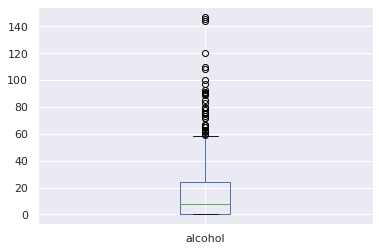

In [ ]:
data['alcohol'].plot(kind='box')    # El gráfico muestra la existencia de datos atípicos, el valor de la mediana ronda los 7.5
plt.show()

In [ ]:
data['alcohol'].quantile(0.25)  #primer quartil indica que un 25% de los valores de la caracteristica son menor o igual a 51

0.51

In [ ]:
data['alcohol'].quantile(0.5)  # el 50% del los valores de la caracteristica son menor o igual a 7.51

7.51

In [ ]:
data['alcohol'].quantile(0.75) # el 75% del los valores de la caracteristica son menor o igual a 23.89

23.8925

Histograma de alcohol

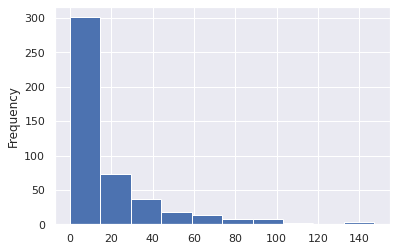

In [ ]:
data['alcohol'].plot.hist();    # se observa una distribución de los datos con un claro  comportamiento
                                # positivo.

Datos analisis de la caracteristica alcohol

In [ ]:
data['alcohol'].min()  # el valor mínimo en la caracteristica alcohol es cero 0

0.0

In [ ]:
data['alcohol'].max()  # el valor maximo presente en la caracteristica es de 147.19

147.19

In [ ]:
data['alcohol'].mode() # el valor que más se repite es de cero 0

0    0.0
dtype: float64

In [ ]:
data['alcohol'].median() # la mediana de la caracteristica corresponde a 7.51 es que el 50% de los datos son menores o iguales a 7.51 

7.51

In [ ]:
data['alcohol'].mean()  # el valor promedio de la caracteristica alcohol es de 17.04

17.044393939393952

In [ ]:
data['alcohol'].std()  # la desviación estandar de la caracteristica es de 24.48 lo que quiere decir que los datos se alejan del promedio en 24.48

24.481058691658568

Análisis de la Caracteristica Age - en el proceso del EDA 

Caracteristica **age** - EDA

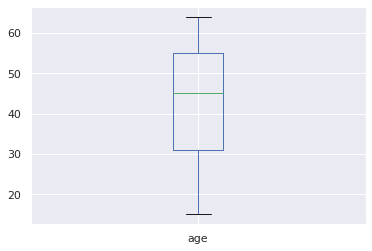

In [ ]:
data['age'].plot(kind='box')   # el gráfico indica que no existen valores atípicos, el valor de la mediana corresponde a 45
plt.show()                     # el valor mínimo de 15 y el valor maximo de 64 , el valor de la mediana es de 45

Histograma de age

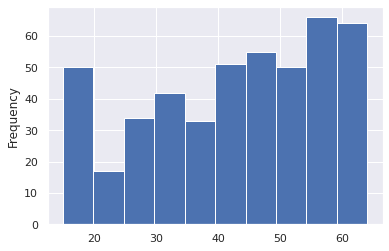

In [ ]:
data['age'].plot.hist();   # La distribución parece de tipo negativa, con un comportamiento de datos no muy claro

Datos analisis de la caracteristica Age

In [ ]:
data['age'].min()  # el valor mínimo presente es de 15

15

In [ ]:
data['age'].max() # la edad maxima es de 64

64

In [ ]:
data['age'].mode()   # la edad que más se repite es 16

0    16
dtype: int64

In [ ]:
data['age'].median()  # la mediana de la caracteristica age corresponde a 45 , lo que indica que el 50% de los valores son menores o iguales a 45

45.0

In [ ]:
data['age'].mean()  # El valor promedio de la caracteristica corresponde a 42.82

42.816017316017316

In [ ]:
data['age'].std()  # la desviación estandar de la caracteristica age es de 14.6 lo que quiere decir que los datos se alejan del promedio en 14.6

14.60895644455249

## Graficas de Scattermatrix
 Gráficos Multivariantes
Matriz Diagrama de Dispersión

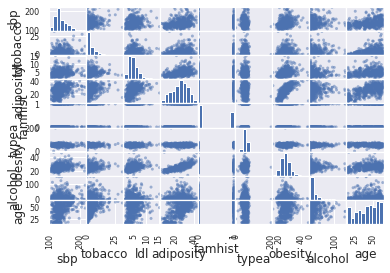

In [ ]:
from pandas.plotting import scatter_matrix # diagramas de correlacción

scatter_matrix(data)
plt.show()

Se realiza un gráfico de multivariables por bloques, para facilitar la interpretación y analisis 

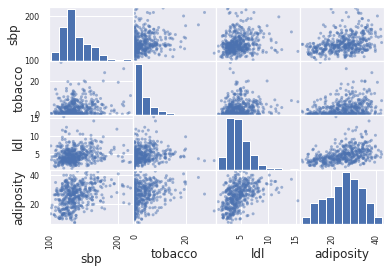

In [ ]:
scatter_matrix(data[["sbp","tobacco",'ldl','adiposity']]);
# la caracteristica ldl y adiposity tienen una correlación positva con un valor intermedio.

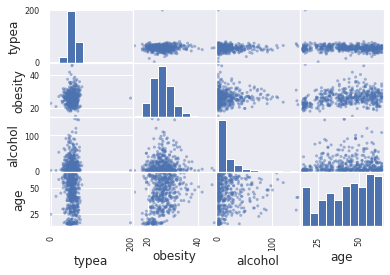

In [ ]:
scatter_matrix(data[["typea","obesity",'alcohol','age']]);
# se aprecia una correlación leve entre la caracteristica age y obesity

Se realiza un agrupado de caracteristicas que podrian presentar relación o no en lo que se denomina la presión arterial = *SBP* **systolic blood pressure** como lo son conductas o situaciones tales como el **fumado**, **obesidad**, **ingesta de alcohol** o **nivel de grasa corporal** =*adiposity* y el **ldl* colesterol malo

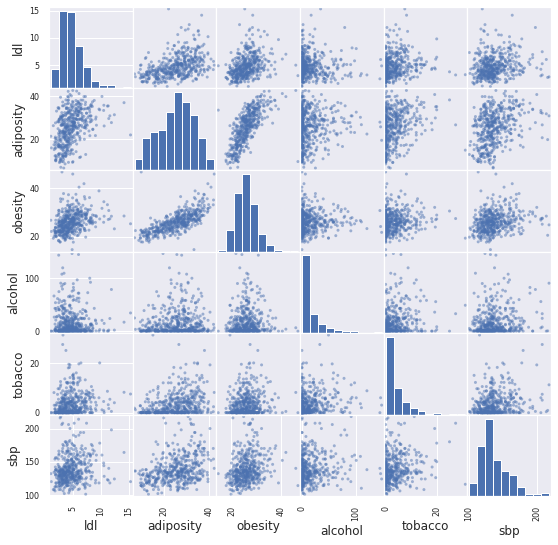

In [ ]:
scatter_matrix((data[['ldl',"adiposity","obesity",'alcohol','tobacco','sbp']]),figsize = (9, 9));
# se observa una correlación positiva fuerte entre la caracteristica adiposity y obesity, si una aumenta la otra tambien
# existe una leve correlación entre adiposity y la caracteristica sbp, indicando que si aumenta adiposity la sbp tiende a aumentar

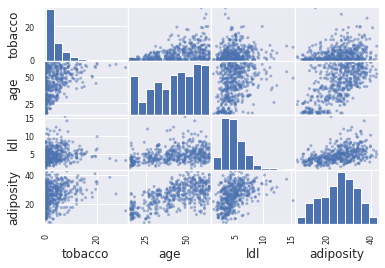

In [ ]:
scatter_matrix(data[['tobacco','age','ldl','adiposity']]);
#Se observa una correlación positva entre la caracteristica tobacco y age
# Se observa una correlacion positiva entre la caracteristica age y la caracteristica adiposity
# si aumenta age la caracteristica adiposity aumenta.

Se muestra el mismo gráfico inicial pero en tamaño aumentado

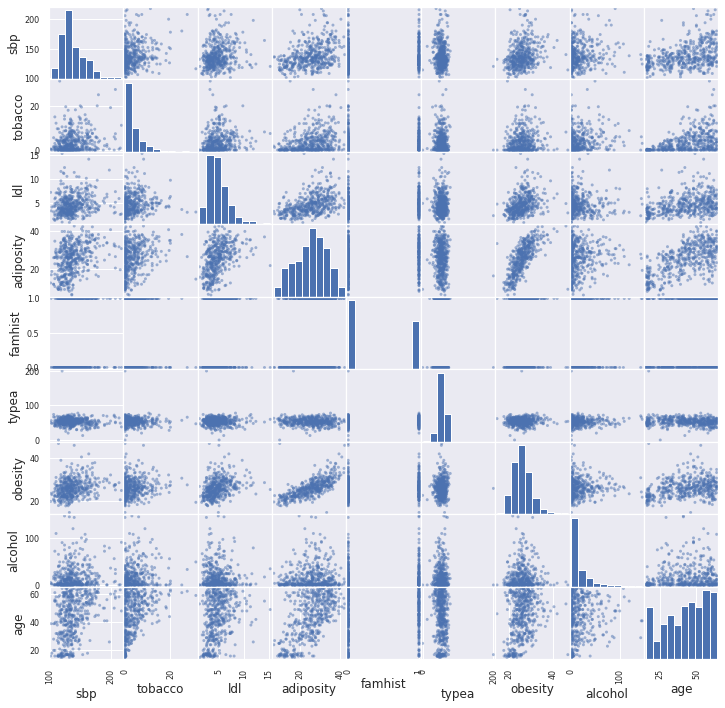

In [ ]:
scatter_matrix(data, figsize = (12, 12));

**Segun el analisis grafica existe una correlasion positiva fuerte entre Adiposity vs obesity - Obesity vs Adiposity y Age vs Adiposity - Adiposity vs Age.**

Ademas se detallan el resto de correlaciones que se evidencian en la gráfica general

**Sbp vs Sbp:** Grafico existente por comparasion con la misma variable.
**Sbp vs Tabacco:** Presenta una dispercion Atipica sin ninguna o poca correlacion.
**Sbp vs Adiposity:** presenta una dispercion atipica con poca o ninguna correlacion.
**Sbp vs LDL:** presenta una dispercion atipica con poca o ninguna correlacion.
**Sbp vs Famhist:** no presente ningun tipo de correlacion.
**Sbp vs typea:** no existe correlacion segun las dispercion de los datos.
**Sbp vs Obesity:** no Existe un tipo de correlacion segun la dispersion de los datos.
**Sbp vs Alcohol:** Existe poca correlacion segun la dispercion de los datos.
**Sbp vs Age:** Presenta una correlacion segun la dispersion de los datos.

**Tabacco vs Sbp:** Presenta una dispercion con algo de correlacion.
**Tabacco vs Tabacco:** Grafico existente por comparasion con la misma variable.
**Tabacco vs Ldl:** Presente una dispercion con muy poca correlacion.
**Tabacco vs Adiposity:**Presente una Dispercion con poca correlacion.
**Tabacco vs Famhist:** no tiene ningun tipo de correlacion.
**Tabacco vs Typea:** no presente ninguna correlacion segun la dispersion.
**Tabacco vs Obesity:** Segun la dispercion presenta algun tipo de correlacion.
**Tabacco vs Alcohol:** Presente algun poca correlacion segun la dispersion ded los datos.
**Tabacco vs Age:** Presenta poca correlacion segun la dispersion de los datos.

**Ldl vs Spb:** Segun la dispersion de los datos presenta algun tipo de correlacion.
**Ldl vs Tabacco:** Segun la dispersion presenta algun tipo de correlacion.
**Ldl vs Ldl:** Grafico existente por comparasion con la misma variable
**Ldl vs Adiposity:** Segun la dispersion de los datos presenta algun tipo de correlacion.
**Ldl vs Famhist:** Segun la dispersion de los datos no presenta correlacion.
**Ldl vs Typea:** Segun la dispersion no presenta correlacion.
**Ldl vs Obesity:** Si presenta algun tipo de correlacion segun la dispercion de los datos.
**Ldl vs Alcohol:** Segun la dispersion de los datos pesenta algun tipo de correlacion de los datos.
**Ldl vs Age:** Segun la dispersion de los datos presenta alguna correlacion de los datos.


**Adiposity vs Sbp:** Segun las dispercion de los datos presenta algun tipos de correlacion.
**Adiposity vs Tabacco:** Segun la dispersion de los Datos presenta poca o ninguna correlacion.
**Adiposity vs Ldl:** Segun la dispersion de los datos Presenta poca o ningun tipo de correlacion.
**Adiposity vs Adiposity:** Grafico existente por comparasion con la misma variable
**Adiposity vs Famhist:** Segun la dispersion no existe correlacion.
**Adiposity vs Typea:** Segun la dispersion no hay correlasion alguna.
**Adiposity vs obesity:** Segun la dispersion de los datos si existe correlacion positiva.
**Adiposity vs Alcohol:** Segun la dispersion de los datos hay algun tipos de correlasion de los datos.
**Adiposity vs Age:**  Segun la dispersion de los datos si existe correlacion positiva.

**Famhist vs Sbp:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Tabacco:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Ldl:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Adiposity:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Famhist:**Grafico existente por comparasion con la misma variable
**Famhist vs Typea:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Obesity:**Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Alcohol:** Segun la dispesion de los datos no presenta correlasion.
**Famhist vs Age:** Segun la dispesion de los datos no presenta correlasion.

**Typea vs Sbp:** Segun la dispersion de los datos no presenta correlasion.
**Typea vs Tabacco:** Segun la dispersion de los datos no presenta correlasion.
**Typea vs Ldl:** Segun la dispersion de los datos no presenta correlasion.
**Typea vs Adiposity:** Segun la dispersion de los datos no presenta correlasion.
**Typea vs Famhist:** No presenta correlasion.
**Typea vs Typea:** Grafico existente por comparasion con la misma variable
**Type vs Abesity:** Segun la dispersion de los datos no presenta correlasion.
**Typea vs Alcohol:** Segun la dispersion de los datos no presenta correlasion. 
**Typea vs Age:** Segun la dispersion de los datos no presenta correlasion.


**Obesity vs Sbp:** Segun la dispersion de los datos no existe correlasion.
**Obesity vs Tabacco:** Segun la dispersion de los datos no existe correlacion con los datos.
**Obesity vs Ldl:** Segun la dispersion de los datos no existe correlasion de los datos.
**Obesity vs Adiposity:** Existe una fuerte correlasion positiva de los datos segun la dispersion.
**Obesity vs Famhist:** Segun la dispersion de los datos no existe correlasion.
**Obesity vs Obesity:** Grafico existente por comparasion con la misma variable.
**Obesity vs Alcohol:** Existe Algun tipos de correlasion segun la dispersion de los datos.
Obesity vs Age: Segun las dispersion de los datos existe algun tipo de correlasion.

**Alcohol vs Sbp:** Existe algun tipos de correlasion segun la dispersion de los datos.
**Alcohol vs Tabacco:** Segun la dirpersion de los datos existe algun tipo de correlasion.
**Alcohol vs Ldl:** Segun la dispersion de los datos existe algun tipo de correlasion.
**Alcohol vs Adiposity:** Segun las dispersion de los datos existe algun tipo de correlasion.
**Alcohol vs Famhist:** Segun la dispersion de los datos no existe Correlasion.
**Alcohol vs Typea:** Segun la dispersion de los datos no existe una correlasion
**Alcohol vs Obesity:** Segun la dispersion de los datos existe algun tipo de correlasion.
**Alcohol vs Alcohol:** Grafico existente por comparasion con la misma variable.
**Alcohol vs Age:** Segun la dispersion de los datos no existe Correlasion alguna.

**Age vs Sbp:** Segun la dispersion de los datos exite algun tipo de correlasion.
**Age vs Tabacco:** Segun la dispersion de los datos Existe algun tipo de correlasion.
**Age vs Ldl:** Segun la dispersion de los datos existe algun tipo de correlasion.
**Age vs Adiposity:**  Segun la dispersion de los datos si existe correlacion positiva.
**Age vs Famhist:** Segun el tipos de dispersion de los datos existe poca correlasion de los datos .
**Age vs Typea:** Existe poca correlasion de los datos segun la dispersion de los datos.
**Age vs Obesity:** Segun la dispersion de los datos existe poca correlasion de los datos.
**Age vs Alcohol:** Segun la dispersion de los datos existe poca correlasion de los datos.
**Age vs Age:** Grafico existente por comparasion con la misma variable.

##Gráfica de Correlación

Por método Spearman

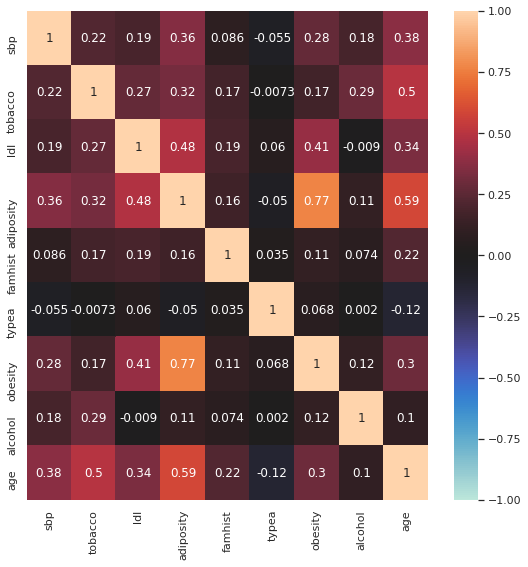

In [ ]:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Por método Pearson

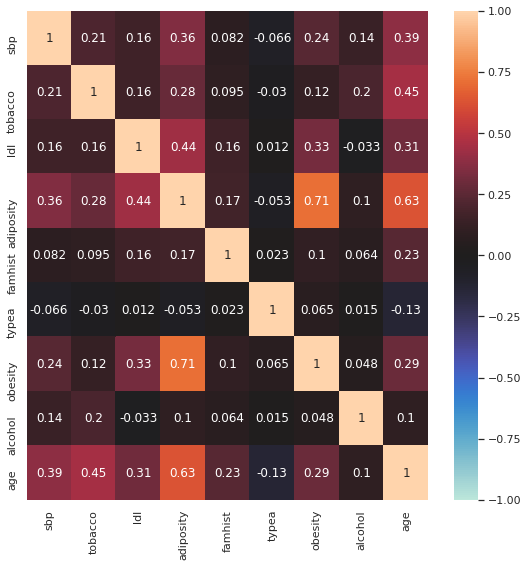

In [ ]:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(method='pearson'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Información según el gráfico

Según el gráfico anterior se observa lo siguiente:

**sbp y adiposity** tienen una leve correlación positiva, en lo que indica que si una de las caracteristicas aumenta la otra lo hara, 
y si una disminuye tambien la otra disminuye
**tobacco (fumado) tiene una relación intermedia con la edad**, en lo que indica que si una de las caracteristicas aumenta la otra lo hara,
y si una disminuye tambien la otra disminuye.

**ldl tiene una tiene una relación intermedia con la adiposity (grasa corporal)**, en lo que indica que si una de las caracteristicas 
aumenta la otra lo hara, y si una disminuye tambien la otra disminuye.

**ldl tiene una tiene una relación intermedia con la obesity (obesidad)**, en lo que indica que si una de las caracteristicas aumenta 
la otra lo hara, y si una disminuye tambien la otra disminuye

**Se detallen las generalidades que se desprenden del gráfico**

**Caracteristica SBP en relación a las otras**
**SBP** y las otras caracteristicas
**Sbp vs Sbp:** Mismo cuadrante.
**Sbp vs Tabacco:** Si Tabacco Aumenta Sbp va aumentar correlasion positiva fuerte.
**Sbp vs Adiposity:** Si Adiposity aumenta el Sbp tambien aumenta tiene una fuerte correlasion positiva.
**Sbp vs LDL:** Si Ldl aumente Sbp aumente tiene una leve correlasion positiva.
**Sbp vs Famhist:** Presente poca o ningun tipo de correlacion positiva.
**Sbp vs typea:** Tiene una correlacion negativa muy pequeña si el Sbp aumenta Typea dismunuira mas .
**Sbp vs Obesity:** Exciste una correlacion fuerte positiva si obesity aumenta Sbp aumneta.
**Sbp vs Alcohol:** Existe una correlacion positiva leve al aumentar el Alcohol el Sbp aumentara.
**Sbp vs Age:**Presenta una fuerte correlacion positivas si Age aumenta el Sbp aumentara.

**Caracteristica Tabacco en relación a las otras**

**Tabacco vs Sbp:** Presenta una correlacion positiva fuerte lo cual cuando aumenta el tabacco aumentara el Spb.
**Tabacco vs Tabacco:** Mismo cuadrante.
**Tabacco vs Ldl:** Presenta una correlasion positiva fuerte si aumenta el Tabacco aumentara el Ldl.
**Tabacco vs Adiposity:**Presenta una correlasion fuerte positiva en la cual si aumente el tabacco aunmetara tambien la Adiposity.
**Tabacco vs Famhist:** tiene algun tipo de correlacion positiva en la cual si tabacco aumenta famhist aumentara.
**Tabacco vs Typea:** Presenta poco correlasion positiva en la cual si el tabacco aumente typea aumentara poco.
**Tabacco vs Obesity:** Presenta poca correlasion positiva en la cual Tabacco aumente y obesity aumenta levemente.
**Tabacco vs Alcohol:** Presente una correlasion positiva en la cual si el tabacco aumenta Alcohol aumentera.
**Tabacco vs Age:** presenta una correlacion positiva alta en la cual aumeta el Tabacco con la edad..

**Caracteristica ldl en relación a las otras**

**Ldl vs Spb:** Tiene una leve correlacion positiva en la cual si aumeta el Sbp el Ldl aumentara 
**Ldl vs Tabacco:** ZTiene una fuerte correlacion positiva en la cual el Tabacco aumenta el Ldl aumentara.
**Ldl vs Ldl:** Mismo cuadrante
**Ldl vs Adiposity:** Tiene una alta correlacion positiva en la cual el adiposity aumenta el Ldl aumentara.
**Ldl vs Famhist:** Exite poca correlasion positiva en la cual si Ldl aumenta el Famhist aumenta levemente.
**Ldl vs Typea:** Presenta poca correlasion positiva donde el Ldl aumenta el Typea aumentara muy levemente.
**Ldl vs Obesity:** Tiene una fuerte correlasion positiva en la cual si el Ldl aumenta la obesity aumentara.
**Ldl vs Alcohol:** Presenta una correlasion negativa en la cual si el ldl aumenta el Alcohol disminuira mas.
**Ldl vs Age:** Presenta una correlasion positiva alta en la cual el Ldl aumenta con la Age.

**Caracteristica Adiposity en relación a las otras**

**Adiposity vs Sbp:** Presenta una correlasion positiva alta la cual si incremente Adiposity el Sbp aumentara.
**Adiposity vs Tabacco:**Tiene una correlacion positiva fuerte en la cual Adiposity aumenta el Sbp aumentara.
**Adiposity vs Ldl:** Tiene una correlacion muy alta en la cual si adiposity aumenta el Ldl aumentara.
**Adiposity vs Adiposity:** Mismo cuadrante.
**Adiposity vs Famhist:** Tiene poca correlacion positiva en la cual si el Adiposity aumenta levemente aumentara el Famhist.
**Adiposity vs Typea:** Tiene una correlasion negativa casi ninguna la cual es poca si Adiposity aumenta el typea dismuniura.
**Adiposity vs Obesity:** Tiene una muy alta correlasion positiva en la cual si aumenta la Adiposity la obesity Aumentara.
**Adiposity vs Alcohol:**Presenta una correlasion positiva leve la cual si Adiposity aumenta el alcohol aumentara levemente.
**Adiposity vs Age:**  Tiene una correlasion alta en la cual Adiposity aumenta y la Age tambien aumentara.

**Caracteristica Famhist en relación a las otras**.

**Famhist vs Sbp:** Tiene una correlasion positiva muy leve en la cuan si aumenta el Famhist el Sbp aumenta muy levemente.
**Famhist vs Tabacco:** tene una correlasion positiva leve en al cual Famhista aumente Tabacco aumentara levemente.
**Famhist vs Ldl:** tiene una correlacion positiva leve en la cual si aumenta el Famhist el Ldl aumenta levemente.
**Famhist vs Adiposity:** Tiene una correlasion leve positiva en el cual aumenta el Famhist y Adiposity aunmentara levemente.
**Famhist vs Famhist:**Mismo cuadrante
**Famhist vs Typea:** Tiene una correlacion positiva muy leve la cual si aumenta el famhist el typea casi no aumentara.
**Famhist vs Obesity:**Presenta una leve correlasion positiva la cual si Aumenta el Famhist le Obesity aumenta muy levemente.
**Famhist vs Alcohol:** Presenta poca correlasion positiva en la cual si famhiste aumenta el alcohol aumentara muy leve.
**Famhist vs Age:** Presenta una correlasion positiva  la cual aumenta si famhist aumenta la Age tambien aumentara poco.

**Caracteristica Typea en relación a las otras**

**Typea vs Sbp:**Presenta una correlasion negativa la cual si eincrementa el Typea el Sbp disminuira mas.
**Typea vs Tabacco:** Presenta una correlasion negativa la cual cuando aumenta el Typea el tabacco disminuye.
**Typea vs Ldl:** Tiene una leve correlasion positiva la cual cuando Typea aumente la Lede aumenta levemente.
**Typea vs Adiposity:** tiene una correlasion negativa la cual cuando aumenta el typea el Adiposity disminuye.
**Typea vs Famhist:** Tiene una leve correlasion positiva la cual si el typea Auemnte el Famhist aumenta muy levemente.
**Typea vs Typea:**Mismo cuadrante
**Type vs Abesity:** tiene una correlacion positiva muy leve la cual si el typea aumente Abesity aumente muy leve.
**Typea vs Alcohol:** Tiene una correlasion poca en la cual si el typea Aumenta el alcohol aumentara muy poco. 
**Typea vs Age:** Tiene uan correalsion negativa la cual si aumenta el typea el Age disminuira.

**Caracteristica Obesity en relación a las otras**

**Obesity vs Sbp:** Tiene una correlasion positiva en la cual si Obesity auemnta la Spb aumentara.
**Obesity vs Tabacco:** Tiene una correlasion positiva leve en la cuan si Obesity aumenta el Tabaco aumentara muy levemente.
**Obesity vs Ldl:** Tiene una Correlasion alta en la cual si Obesity aumenta el Ldl aumentara.
**Obesity vs Adiposity:** Tiene una correlasion positiva muy alta en la cual si aumenta obesity Adiposity aumentara.
**Obesity vs Famhist:** Existe muy poca correlacion positiva lo cual si Obesity aumenta el Famhist aumenta muy poco.
**Obesity vs Obesity:** Mismo cuadrante.
**Obesity vs Alcohol:** Tiene poca correlasion positiva la cual si obesity aunmenta el Alcohol aumenta levemente.
Obesity vs Age: Tiene una correlasion positiva alta la cual Obesity aumenta Age aumentara.

**Caracteristica Alcochol en relación a las otras**

**Alcohol vs Sbp:** Tiene una leve correlasion positiva en la cual si Alcohol aumenta Sbp aumentara levemente.
**Alcohol vs Tabacco:** Tiene una correlasion positiva alta en la cual si el Alcohol aumenta el tabaco aumentara.
**Alcohol vs Ldl:**Tiene una correlasion alta en la cual si aumenta el Alcohol el Ldl aumentara.
**Alcohol vs Adiposity:** Tiene una correlasion muy alta en la cual si aumenta el Alcohol el Adiposity aumentara.
**Alcohol vs Famhist:** Tiene una correlasion positiva leve la cual si aumenta Alcohol Famhist aumentara levemente.
**Alcohol vs Typea:** Tiene muy poca correlasion positiva la cual si aumenta el alcohol el typea aumenta levemente
**Alcohol vs Obesity:** No Tiene correlasion.
**Alcohol vs Alcohol:** Mismo cuadrante.
**Alcohol vs Age:** Tiene poca correlasion positiva la cual al aumentar Alcoholn age aumentara levemente.

**Caracteristica Age en relación a las otras**

**Age vs Sbp:** Tiene alta correlasion positiva lo cual al aumentar la Age Aumenta el Sbp.
**Age vs Tabacco:** Presenta una correlasion positiva muy alta lo cual al aume ntar Age aumentara el Tabacco.
**Age vs Ldl:** Presenta una correlacion positiva que al aumentar Age aumenta el Ldl.
**Age vs Adiposity:**  Presenta una alta correlacion positiva que al aumentar Age aumenta Adiposity.
**Age vs Famhist:** Existe algna correlacion positiva lo cual si Age Aumente Famhist aumentara levemente.
**Age vs Typea:** Esite correlasion negativa lo cual al incrementar Age disminuye Typea.
**Age vs Obesity:**Presenta una correlacion positiva alta lo que indica que al aumentar Age aumentara Obesity.
**Age vs Alcohol:** Presenta algun tipos de correlacion positiva la cual si aumenta Age aumentara levemente Alcohol.
**Age vs Age:** Mismo cuadrante.


##Realizar Tablas y Tablas Pivote para Representar los datos

Para observar los datos en relación de las edades, se procede a ralizar una agrupación según edades en funcion de suma

In [ ]:
data.groupby(['age']).sum()   # con esto podemos ver información según las edades de la muestra masculina, lo que
                              # permite tener un agrupado por esta caracteristica

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol
age,,,,,,,,
15,370,0.00,6.61,45.36,0,147.0,64.93,1.57
16,2440,0.81,71.37,319.26,3,1008.0,429.67,80.56
17,2179,0.76,48.71,239.85,3,1070.0,405.33,24.62
18,1019,0.20,24.72,139.40,1,415.0,181.15,11.76
19,262,0.00,6.67,26.51,0,108.0,48.40,2.06
20,708,4.11,19.62,82.79,3,331.0,126.82,41.50
21,402,1.03,8.63,39.93,1,169.0,63.60,9.88
23,254,0.16,7.33,42.65,0,137.0,55.00,89.62
24,806,3.49,26.30,119.82,1,354.0,153.83,93.96


##Tablas Pivote 

Tabla pivote que muestra las caractersiticas por le index de Edad , con las caracteristicas de famhist y sbp, con la opción de presentar los datos en promedio

In [ ]:
data.pivot_table('sbp', index= 'age', columns= 'famhist', aggfunc= 'mean')

famhist,0,1
age,,
15,123.333333,NaN
16,122.000000,122.000000
17,127.357143,132.000000
18,122.428571,162.000000
19,131.000000,NaN
20,111.333333,124.666667
21,132.000000,138.000000
23,127.000000,NaN
24,134.000000,136.000000


Esta tabla Pivote muestra el promedio de presion arterial SBP según si las personas presentan o no Historial Familiar de Problemas Cadiacos famhist, según las edades, similar a la enterior solo que se le agrega fill value = 0 para visualizar mejor los datos que quedan nan.

In [ ]:
data.pivot_table('sbp', index= 'age', columns= 'famhist', aggfunc= 'mean',fill_value=0)

famhist,0,1
age,,
15,123.333333,0.000000
16,122.000000,122.000000
17,127.357143,132.000000
18,122.428571,162.000000
19,131.000000,0.000000
20,111.333333,124.666667
21,132.000000,138.000000
23,127.000000,0.000000
24,134.000000,136.000000


Represetar la anterior tabla pivote en un gráfico

<Figure size 1440x1440 with 0 Axes>

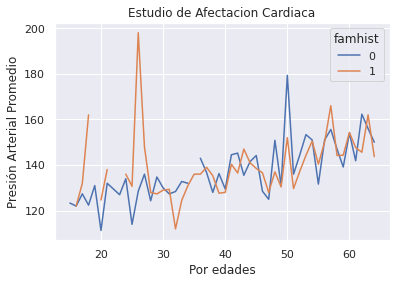

In [ ]:
plt.figure(figsize = (20,20))
data.pivot_table('sbp', index= 'age', columns= 'famhist', aggfunc= 'mean').plot()
plt.title("Estudio de Afectacion Cardiaca")
plt.ylabel("Presión Arterial Promedio")
plt.xlabel("Por edades")
plt.show();
# Según el gráfico el comportamiento de los niveles de presión arterial sbp es mjy variable

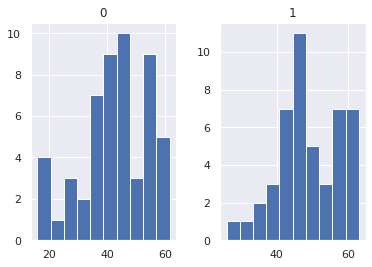

In [ ]:
data.pivot_table('age', index= 'sbp', columns= 'famhist',aggfunc = "mean").hist();
plt.show()
# La dsitribución de los datos no parece uniforme, y no se aprecia que exista una presión arterial sbp mayor o menor
# entre aquellos que tengan o no historial familiar.

Se crea un Box plot de la tabla pivote anterior 

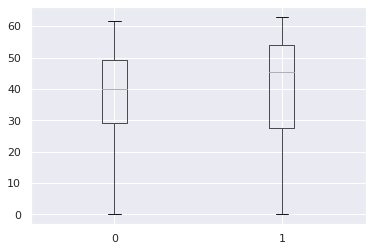

In [ ]:
data.pivot_table('age', index= 'sbp', columns= 'famhist',aggfunc = "mean",fill_value=0).boxplot();

Esta tabla Pivote muestra el total de consumo de tabaco por **age** = Edades de las personas , y si la personas muestra o no Historial Familiar de Problemas Cadiacos = **famhist** (columnas)

In [ ]:
data.pivot_table('tobacco', index= 'age', columns= 'famhist', aggfunc= 'sum',fill_value=0)
# segun los resultados de esta tabla indica un aparente mayor consumo de tabaco o fumado en personas de mayor edad
# posiblemente tiene lógica en vista que en temprana edad se está iniciando en habito y una persona adulta fumadora
# tendrá como una conducta más habitual el consumo de tabaco

famhist,0,1
age,,
15,0.00,0.00
16,0.71,0.10
17,0.76,0.00
18,0.20,0.00
19,0.00,0.00
20,1.61,2.50
21,1.03,0.00
23,0.16,0.00
24,2.13,1.36


<Figure size 1440x1440 with 0 Axes>

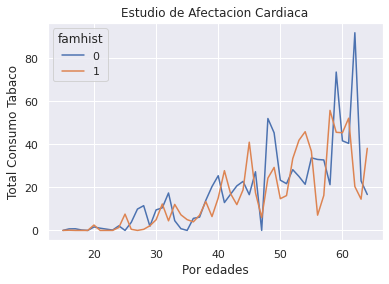

In [ ]:
plt.figure(figsize = (20,20))
data.pivot_table('tobacco', index= 'age', columns= 'famhist', aggfunc= 'sum',fill_value=0).plot()
plt.title("Estudio de Afectacion Cardiaca")
plt.ylabel("Total Consumo Tabaco")
plt.xlabel("Por edades")
plt.show();

# muestra el comportamiento de los datos por las edades , según si tienen o no historial familiar de enfermedad cardiaca y el consumo de tabaco
# muestra que a mayor edad se presenta un mayor consumo acumulado de tabaco

Se crea un boxplot de la tabla pivote anterior

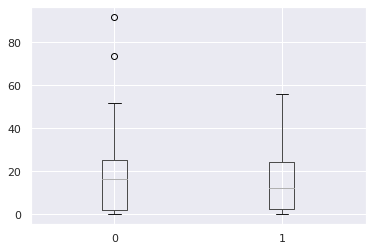

In [ ]:
data.pivot_table('tobacco', index= 'age', columns= 'famhist', aggfunc= 'sum',fill_value=0).boxplot();
#se observan valores atípicos

Limpiar los datos atipicos

In [ ]:
data5 = data.copy()

In [ ]:
quantiles1 = np.percentile(data5['tobacco'], [25,50,75])
quantiles1

array([0.0525, 2.    , 5.475 ])

In [ ]:
median5 = quantiles1 [1]
IQR1= quantiles1 [2]-quantiles1[0]
sigma1 = 0.75 * IQR1

In [ ]:
sigma1

4.066875

In [ ]:
data5 = data5.query("(tobacco > @median5 - 3*@sigma1) & (tobacco < @median1 + 3*@sigma1)")

In [ ]:
data5.shape

(447, 9)

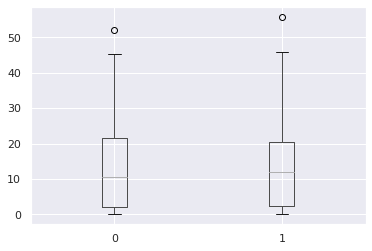

In [ ]:
data5.pivot_table('tobacco', index= 'age', columns= 'famhist', aggfunc= 'sum',fill_value=0).boxplot();
#se observan valores atípicos

Hacer rangos o escalas

In [ ]:
data2 = data.copy()  # primero realizamos una copia del dataset para no incorporar la columna al dataset original

In [ ]:
data2.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49


In [ ]:
data2['age_range'] = (data2['age']//5)*5   # se procede a realizar un rango por edades para generar una tabla pivote

In [ ]:
data2.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,age_range
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52,50
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63,60
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46,45
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58,55
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49,45


In [ ]:
data.head()   # en la data orginal no se incluye el rango, esto para que no interfiera en visualizaciones 
              # futuras

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49


Tabla Pivote por Rangos de Edad que muestra quienes fuman más y si estos tienen o no historial familiar de enfermedad cardiaca **famhist**

In [ ]:
data2.pivot_table('tobacco', index= 'age_range', columns= 'famhist', aggfunc= 'sum',fill_value=0)
# De esta tabla pivote se desprende la siguiente información, las personas en el estudio realizado que 
# presentan mayor fumado son aquellas con mayor edad, a mayor edad mayor consumo de tabaco, siendo el rango de mayor consume
# tabaco aquellos que se encuentran en tre la edad 55 a 60 años

famhist,0,1
age_range,,
15,1.67,0.10
20,4.93,3.86
25,27.11,10.76
30,42.78,41.02
35,46.12,35.91
40,98.71,90.75
45,141.23,118.09
50,119.84,152.10
55,194.32,161.50


Un gráfico de barras de la tabla anterior que muestra el comportamiento de consumo de tabaco por rango de edad de las personas en el estudio, entre aquellos que presentan o no historial familiar de enfermedad cardiaca

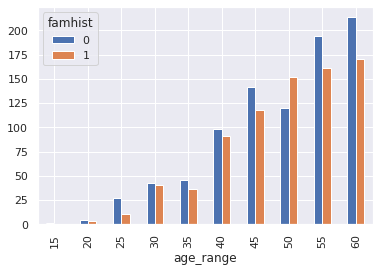

In [ ]:
data2.pivot_table('tobacco', index= 'age_range', columns= 'famhist', aggfunc= 'sum',fill_value=0).plot(kind = 'bar')
# este gráfico indica que a mayor edad mayor consumo de tabaco, ademas que aquellos que no tienen historial familiar
#de enfermedad cardiaca (famhist) tienden a fumar un poco más que aquellos que sí presentan un 
# hsitorial familiar de enfermedad cardiaca

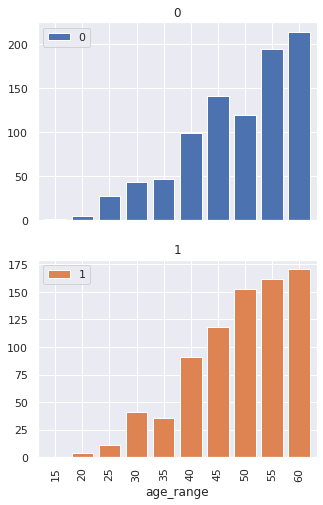

In [ ]:
data2.pivot_table('tobacco', index= 'age_range', columns= 'famhist', aggfunc= 'sum',fill_value=0).plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(5,8));
             # este gráfico indica que a mayor edad mayor consumo de tabaco, ademas que aquellos que no tienen historial familiar
#de enfermedad cardiaca (famhist) tienden a fumar un poco más que aquellos que sí presentan un hsitorial familiar de enfermedad cardiaca

Tabla Pivote por Rangos de Edad que muestra presion arterial promedio y si estos tienen o no historial familiar de enfermedad cardiaca **famhist**

In [ ]:
round(data2.pivot_table('sbp', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2)

# De la siguiente tabla pivote se desprende la siguiente información, según el rango de edad la presion arterial sbp
# es mayor segun la edad.

famhist,0,1
age_range,,
15,124.33,132.00
20,126.83,129.60
25,130.92,138.67
30,129.67,126.50
35,133.76,133.00
40,138.32,139.80
45,137.96,135.78
50,153.00,143.19
55,142.51,146.29


Grafica de la tabla pivote anterior, en el que se muestra el comportamiento de fumado por rangos de edad y si estos tienen o no historial de enfermedad cardiaca

<Figure size 1440x1440 with 0 Axes>

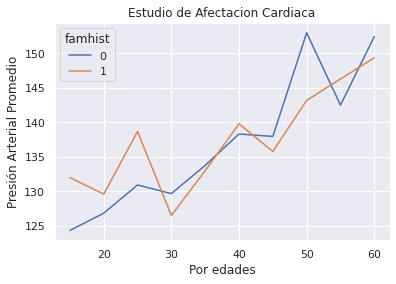

In [ ]:
plt.figure(figsize = (20,20))
round(data2.pivot_table('sbp', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Estudio de Afectacion Cardiaca")
plt.ylabel("Presión Arterial Promedio")
plt.xlabel("Por edades")
plt.show();

Grafica de barras que indica el novel de presión arterial promedio entre los que presentan historial familiar de enfermedad cardiaca (famhist) por rangos de edad

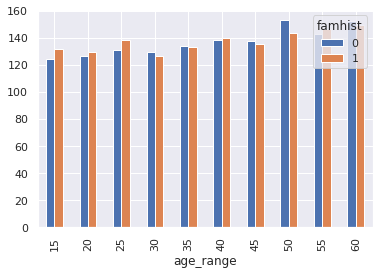

In [ ]:
round(data2.pivot_table('sbp', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')

Tabla pivote en relación del nivel de obesidad entre aquellos que tienen histirial familiar de enfermedad cardiaca (fanhist) por rangos de edad

In [ ]:
round(data2.pivot_table('obesity', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2)

famhist,0,1
age_range,,
15,22.69,21.97
20,24.12,21.95
25,25.08,24.85
30,26.44,26.51
35,25.51,26.49
40,26.04,27.10
45,26.91,27.51
50,29.03,27.67
55,26.27,26.82


Gráfica de la tabla pivote anterior en relación del nivel de obesidad entre aquellos que tienen histirial familiar de enfermedad cardiaca (fanhist) por rangos de edad

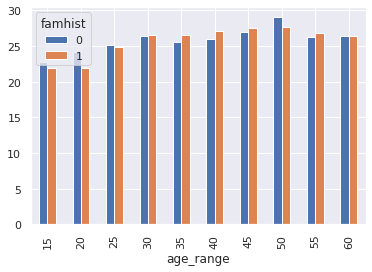

In [ ]:
round(data2.pivot_table('obesity', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar')
# Este grpafico muestra que el nivel de obesidad es muy similar, no parece existir una diferencia significativa entre ambas condiciones
# pero sí un nivel mayor de obesidad entre los rangos de mayor edad

Tabla Pivote que muestra el nivel promedio de **adiposity** = adiposidad o grasa localizada  (colesterol malo) entre aquellos que presentan o no historial familiar de enfermedad cardiaca y por rangos de edades

In [ ]:
round(data2.pivot_table('adiposity', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2)

famhist,0,1
age_range,,
15,15.44,15.19
20,17.61,14.77
25,19.51,18.98
30,23.50,21.82
35,22.30,22.79
40,26.66,29.18
45,27.83,28.65
50,31.72,30.30
55,29.09,28.73


Grafica relacionada a la Tabla Pivote anterior que muestra el nivel promedio de **adiposity** = adiposidad o grasa localizada  (colesterol malo) entre aquellos que presentan o no historial familiar de enfermedad cardiaca y por rangos de edades

<Figure size 1440x1440 with 0 Axes>

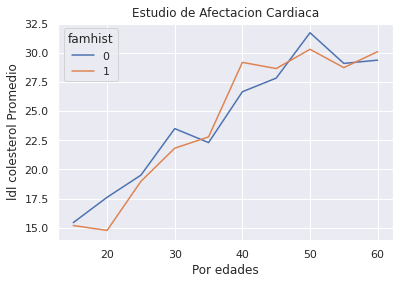

In [ ]:
plt.figure(figsize = (20,20))
round(data2.pivot_table('adiposity', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Estudio de Afectacion Cardiaca")
plt.ylabel("ldl colesterol Promedio")
plt.xlabel("Por edades")
plt.show();
# este gráfico muestra que entre aquellos que tienen historial o no de enfermedad cardiaca en sus familias (famhist) tienen
# un nivel de adiposity muy similar

Tabla Pivote que muestra el nivel promedio de ldl (colesterol malo) entre aquellos que presentan o no historial familiar de enfermedad cardiaca y por rangos de edades

In [ ]:
round(data2.pivot_table('ldl', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2)

famhist,0,1
age_range,,
15,3.15,3.25
20,3.78,3.32
25,3.94,4.92
30,4.40,4.55
35,3.97,4.42
40,5.10,5.86
45,5.01,5.02
50,4.67,5.94
55,5.19,5.39


Gráfica de Tabla Pivote anterior que muestra el nivel promedio de ldl (colesterol malo) entre aquellos que presentan o no historial familiar de enfermedad cardiaca y por rangos de edades

<Figure size 1440x1440 with 0 Axes>

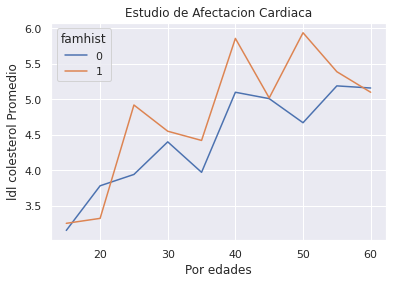

In [ ]:
plt.figure(figsize = (20,20))
round(data2.pivot_table('ldl', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2).plot()
plt.title("Estudio de Afectacion Cardiaca")
plt.ylabel("ldl colesterol Promedio")
plt.xlabel("Por edades")
plt.show();
# Según este grpafico muestra que existe un nivel promedio mayor de ldl colesterol malo entre aquellos que tienen
# historial familiar con enfermedad cardiaca 

Tabla Pivote que muestra el consumo promedio entre aquellos que presentan o no historial familiar de enfermedad cardiaca y por rangos de edades

In [ ]:
round(data2.pivot_table('alcohol', index= 'age_range', columns= 'famhist', aggfunc= 'mean',fill_value=0),2)

famhist,0,1
age_range,,
15,2.08,4.48
20,16.07,8.42
25,24.67,20.81
30,14.64,23.40
35,17.12,18.46
40,19.21,30.64
45,25.16,17.21
50,18.14,15.42
55,13.87,25.10


In [ ]:
data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49


##ANOVA

Detalle del dataset SAHeart

El estudio está enfocado en población masculina de una edad entre 15 a 64 años en la región de Sudafrica 
las caracteristicas del estudio son : 
sbp: systolic blood pressure,  tobacco: cumulative tobacco (kg),  ldl: low density lipoprotein cholesterol,
adiposity:     famhist: family history of heart disease (Present=1, Absent=0)
typea: type-A behavior ,    obesity,
alcohol: current alcohol consumption,   age: age at onset

In [ ]:
data3 = data.copy()

In [ ]:
data3.head(5)   

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49


In [ ]:
import scipy.stats as stats   #impotacion de la biblioteca de estadistica

In [ ]:
data3.dtypes    #comprobamos que todos estén en formato numerico

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea        float64
obesity      float64
alcohol      float64
age            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_encoder = LabelEncoder()

In [ ]:
print("Influencia del famhist/ historial familiar sobre SBP presion arterial") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["sbp"], data3[data3["famhist"]== 1]["sbp"]))
print()
print("Influencia del famhist/ historial familiar sobre fumado/tobaco") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["tobacco"], data3[data3["famhist"]== 1]["tobacco"]))
print()
print("Influencia del famhist/ historial familiar sobre LDL colesterol") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["ldl"], data3[data3["famhist"]== 1]["ldl"]))
print()
print("Influencia del famhist/ historial familiar sobre adiposity/ grasa corporal") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["adiposity"], data3[data3["famhist"]== 1]["adiposity"]))
print()
print("Influencia del famhist/ historial familiar sobre obesity/ obesidad") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["obesity"], data3[data3["famhist"]== 1]["obesity"]))
print()
print("Influencia del famhist/ historial familiar sobre alcohol") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["alcohol"], data3[data3["famhist"]== 1]["alcohol"]))
print()
print("Influencia del famhist/ historial familiar sobre age/edad") 
print(stats.f_oneway(data3[data3["famhist"]== 0]["age"], data3[data3["famhist"]== 1]["age"]))
print()

Influencia del famhist/ historial familiar sobre SBP presion arterial
F_onewayResult(statistic=3.1283087125281015, pvalue=0.07760618353588801)

Influencia del famhist/ historial familiar sobre fumado/tobaco
F_onewayResult(statistic=4.228471650801951, pvalue=0.040314814171165635)

Influencia del famhist/ historial familiar sobre LDL colesterol
F_onewayResult(statistic=12.35259223927411, pvalue=0.0004839705777565132)

Influencia del famhist/ historial familiar sobre adiposity/ grasa corporal
F_onewayResult(statistic=13.267259990639152, pvalue=0.0003008075023510091)

Influencia del famhist/ historial familiar sobre obesity/ obesidad
F_onewayResult(statistic=4.828885255572376, pvalue=0.028484503297451197)

Influencia del famhist/ historial familiar sobre alcohol
F_onewayResult(statistic=1.8913696629395682, pvalue=0.16971690028699915)

Influencia del famhist/ historial familiar sobre age/edad
F_onewayResult(statistic=26.872948746894696, pvalue=3.2602776527500005e-07)



Condiciones para el ANOVA:

En ANOVA de un factor solo se relacionan dos variables: una variable dependiente (o a explicar) y una variable independiente (que en esta técnica se suele llamar factor)
La variable dependiente es cuantitativa (escalar) y la variable independiente es categórica (nominal u ordinal).
Se pide que las variables sigan la distribución normal, aunque como siempre esto es difícil de cumplir en investigaciones sociales.

Al ser la caracteristica famhist la unica en condicion original en forma de categórica u object (presenta o no presenta) que se convirtió a 1 ó 0, es la que se puede utiliar para generar el ANOVA

**INTERPRETACIONES DE LOS ANOVAS**

1.**Influencia del famhist/ historial familiar sobre SBP presion arterial**

F_onewayResult(statistic=3.1283087125281015, pvalue=0.07760618353588801)
como el resultado de l pvalue es > 0.05 se acepta la hipotesis nula. 
*Se acepta la hipótesis nula y se rechaza la hipótesis alternativa*.
No existe una evidencia significativa que indique que el historial familiar influya en el nivel de presion arterial

2.**Influencia del famhist/ historial familiar sobre fumado = tobaco**


F_onewayResult(statistic=4.228471650801951, pvalue=0.040314814171165635)
como el resultado de l pvalue es < 0.05 se rechaza la hipotesis nula y se acepta la hipotesis alternativa
Existe una evidencia significativa que indica que el historial familiar influye en la conducta del fumado
**Segun estudio realizado Por el comite nacional para la **Prevencion del tabaquismo USA Segun el blog Quirosalud de España 2014****

3.**Influencia del famhist/ historial familiar sobre LDL colesterol**

F_onewayResult(statistic=12.35259223927411, pvalue=0.0004839705777565132)
como el resultado del pvalue es < 0.05 

**se rechaza la hipotesis nula y se acepta la hipotesis alternativa**
existe una evidencia significativa que indica que el historial familiar influye en el nivel de LDL colesterol.

Si tiene un nivel alto de colesterol LDL, esto significa que tiene demasiado colesterol LDL en la sangre lo que genera un riesgo de enfermedad coronaria Segun articulo de la revista **Medineplus**

4.**Influencia del famhist/ historial familiar sobre adiposity= grasa corporal**

F_onewayResult(statistic=14.078046940658153, pvalue=0.00019779752274611502)
como el resultado del pvalue es < 0.05 

**se rechaza la hipotesis nula y se acepta la hipotesis alternativa**
Existe una evidencia significativa que indica que el historial familiar influye en el nivel de adiposity/ grasa corporal

5.**Influencia del famhist/ historial familiar sobre obesity/ obesidad**

F_onewayResult(statistic=4.828885255572376, pvalue=0.028484503297451197)

como el resultado del pvalue es < 0.05 
**se rechaza la hipotesis nula y se acepta la hipotesis alternativa**

Existe una evidencia significativa que indica que el historial familiar influye en la obesidad

El exceso de peso es el factor de riesgo de enfermedad cardiovascular más prevalente y ciertamente el factor que menos mejora en sujetos con enfermedad cardiovascular establecida. Segun el estudio de la **Revista Española de Cardiologia.** febrero 2011

6.**Influencia del famhist/ historial familiar sobre alcohol**

F_onewayResult(statistic=1.8913696629395682, pvalue=0.16971690028699915)
como el resultado del pvalue es > 0.05 

**Se acepta la hipótesis nula y se rechaza la hipótesis alternativa.**
No existe una evidencia significativa que indique que el hsitorial familiar influya en la conducta factor alcohol

7.**Influencia del famhist/ age**

F_onewayResult(statistic=26.872948746894696, pvalue=3.2602776527500005e-07)
como el resultado de l pvalue es > 0.05 se acepta la hipotesis nula. 
*Se acepta la hipótesis nula y se rechaza la hipótesis alternativa*.
No existe una evidencia significativa que indique que el historial familiar influya en la edad

##E.**Modelo Machine Learning**

Se inicia para la generación del modelo de machine learning por la data, en este caso se utilizará una copia del original

In [ ]:
data4 = data.copy()

In [ ]:
data4.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49.0,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55.0,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52.0,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51.0,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60.0,25.99,57.34,49


In [ ]:
data4.dtypes  # para una descripción del tipo de los datos

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea        float64
obesity      float64
alcohol      float64
age            int64
dtype: object

Se debe crear un gráfico para ver las correlaciones

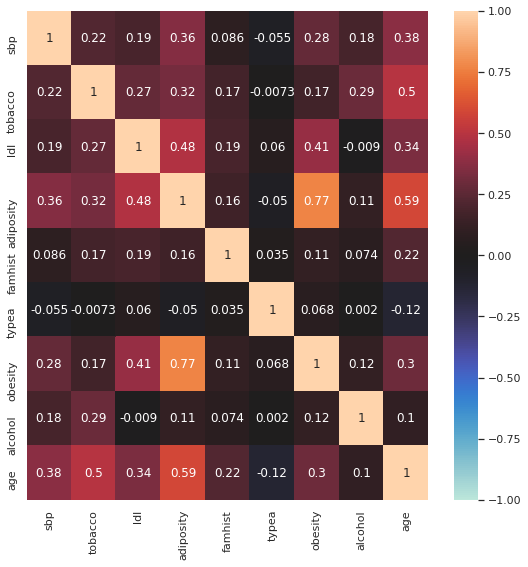

In [ ]:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

# Se deben tomar aquellas que no tengan correlación

In [ ]:
# Extraer solo las variables que se va a necesitar
datos = data4.iloc[:,5:7].values

In [ ]:
datos    # se va utilizar la caracteristica Typea y obesity en vista que presentan baja (casi nula) correlacion

array([[ 49.  ,  25.3 ],
       [ 55.  ,  28.87],
       [ 52.  ,  29.14],
       [ 51.  ,  31.99],
       [ 60.  ,  25.99],
       [ 62.  ,  30.77],
       [ 59.  ,  20.81],
       [ 62.  ,  23.11],
       [ 49.  ,  24.86],
       [ 69.  ,  30.11],
       [ 72.  ,  26.81],
       [ 65.  ,  23.09],
       [ 59.  ,  21.57],
       [ 49.  ,  23.63],
       [ 54.  ,  23.53],
       [ 35.  ,  25.89],
       [ 60.  ,  25.31],
       [ 78.  ,  32.73],
       [ 61.  ,  29.3 ],
       [ 45.  ,  30.09],
       [ 74.  ,  20.92],
       [ 51.  ,  26.16],
       [ 62.  ,  24.64],
       [ 54.  ,  28.7 ],
       [ 61.  ,  26.19],
       [ 54.  ,  23.23],
       [ 60.  ,  38.8 ],
       [ 59.  ,  20.96],
       [ 60.  ,  29.43],
       [ 60.  ,  28.07],
       [ 51.  ,  21.86],
       [ 66.  ,  22.13],
       [ 53.  ,  28.07],
       [ 49.  ,  30.25],
       [ 56.  ,  29.84],
       [ 57.  ,  19.49],
       [ 47.  ,  27.36],
       [ 48.  ,  30.9 ],
       [ 70.  ,  24.86],
       [ 75.  ,  27.68],


In [ ]:
# Reasignación de variables
x = datos

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans # se importa el algoritmo de k medias

def elbow_method(epsilon, figure=False):
    wcss = [] # defino un vector en 0 para ver los distintos wcss segun el numero de clusters que defina
    
    diff = np.inf # Valor de diferencia entre dos iteraciones
    i = 1
    
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))
        
        # Con init= k-means++ y con n_init defino que quiero usar la opcion de ++ (que tiene en cuenta la posicion inicial y su influencia) 
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 123)
        kmeans.fit(x)
        
        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
    
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Numbero de Clusters')
        plt.ylabel('WCSS')
        plt.show()
    
    # Clusters finales
    k = i-1
    return wcss, k


Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16
Iteracion Nº Clusters: k: 17
Iteracion Nº Clusters: k: 18
Iteracion Nº Clusters: k: 19


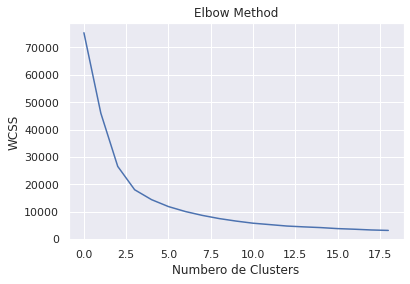

In [ ]:
# Visualizacion de los resultados
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, figure=True)

Comienza a decaer a partir de 3 a 5 y se comienza a volver un poco horizontal alrededor de 6

In [ ]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4


In [ ]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 500, n_init = 20, random_state = 123)
y_kmeans = kmeans.fit_predict(x) 

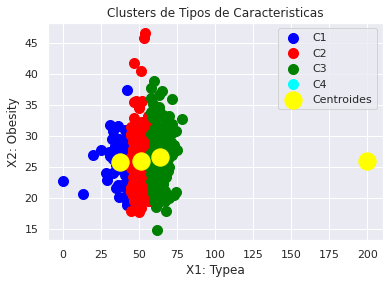

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'C4')
# Para darle o asignarle los colores a los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Tipos de Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Obesity')
plt.legend() # Esta es opcional para pintar la leyenda del recuadro
plt.show()

Información que desprende del primer gráfico de Cluster 
Se obser la clusterizacion de las caracteristicas de obesity y Typea, en donde el primer cluster C1 es de entre 23 a 47 de typea y de 17 a 33 de obesity.

El sgundo cluster C2 es de entre 47 a 51 de Typea y de 17 a 36 de obesity.

Lo que corresponde al cluster C3 se situa dentro del rango de entre 51 a 75 en Typea y de entre 18 a 39 en obesity 

Algoritmo de K-Medias sin Elbow Method


In [ ]:
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 500, n_init = 20, random_state = 123)
y_kmeans = kmeans.fit_predict(x) # fit_predict devuelve para cada punto a que cluster pertenece


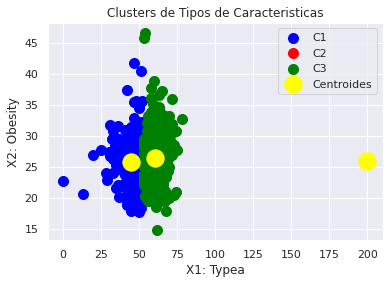

In [ ]:
### Visualizar clusters (se pintan uno a uno)
# Con esto lo que se hace es especificar que se quiere aplicar esto a los puntos del Cluster 1 (index=0), 
# y para la columna 0 (la de los valores de X) y la 1 (la de los valores de y) de esos puntos
# Es decir, en X se tienen dos columnas, se toma la de X (x[0]) y la de y (X[1]) pero aplicado a los puntos de cada cluster 
# (es decir, en vez de todas las filas con [:,] tomo solo las de un cluster [y_label == i])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
# Para darles color a los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Tipos de Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Obesity')
plt.legend()
plt.show()

La información que se desprende del gráfico

Se pueden apreciar claramente dos cluster, el tercer cluster no se observa.
Cluster C1, cluster C1 es de entre 25 a 52 de typea y de 17 a 37 de obesity.

Cluster C2, cluster C2 no se observa por el tipo de gráfico, tal vez se pueda observar por medio de un gráfico en 3d.

Cluster C3, cluster C3 es de entre 50 a 76 de typea y de 18 a 39 de obesity.

Clusterizacion Jerarquica

In [ ]:
### Dendograma para tener el numero optimo de clusters
# Se va a usar a usar una biblioteca nueva, y con ello busco ver el numero optimo de clusters
import scipy.cluster.hierarchy as sch

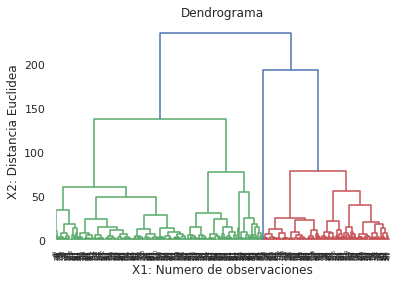

In [ ]:
# Se usa el metodo 'ward' que intenta minimizar la varianza entre clusters. 
# En lugar de minimizar el WC minimal square, se hace con la varianza -> minimizar la varianza en cada cluster
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward')) 
plt.title('Dendrograma')
plt.xlabel('X1: Numero de observaciones')
plt.ylabel('X2: Distancia Euclidea')
plt.show()

In [ ]:
# Entrenar el algoritmo con los datos del conjunto
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x) # Con fit_predict se obtiene el cluster asignado a cada punto

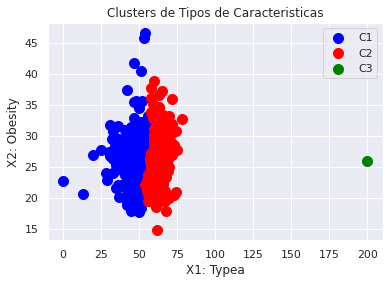

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')

# Visualizando Grafico en dos dimensiones
plt.title('Clusters de Tipos de Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Obesity')
plt.legend()
plt.show()

Información que desprende del primer gráfico de Cluster 
Se obser la clusterizacion de las caracteristicas de obesity y Typea, en donde el primer cluster C1 es de entre 25 a 52 de typea y de 17 a 36 de obesity.

El sgundo cluster C2 es de entre 51 a 75 de Typea y de 18 a 40 de obesity.

Lo que corresponde al cluster C3 no se puede observar, posiblemente se podría observar por medio de una gráfica 3d que permita una perspectiva distinta de los datos

In [ ]:
datos1 = data4.iloc[:,[5,7]].values

In [ ]:
datos1   #caracteristicas typea y alcohol

array([[4.9000e+01, 9.7200e+01],
       [5.5000e+01, 2.0600e+00],
       [5.2000e+01, 3.8100e+00],
       [5.1000e+01, 2.4260e+01],
       [6.0000e+01, 5.7340e+01],
       [6.2000e+01, 1.4140e+01],
       [5.9000e+01, 2.6200e+00],
       [6.2000e+01, 6.7200e+00],
       [4.9000e+01, 2.4900e+00],
       [6.9000e+01, 0.0000e+00],
       [7.2000e+01, 5.6060e+01],
       [6.5000e+01, 0.0000e+00],
       [5.9000e+01, 0.0000e+00],
       [4.9000e+01, 9.7000e-01],
       [5.4000e+01, 6.8000e-01],
       [3.5000e+01, 3.0030e+01],
       [6.0000e+01, 3.4490e+01],
       [7.8000e+01, 1.3890e+01],
       [6.1000e+01, 5.3280e+01],
       [4.5000e+01, 0.0000e+00],
       [7.4000e+01, 1.3370e+01],
       [5.1000e+01, 2.5710e+01],
       [6.2000e+01, 0.0000e+00],
       [5.4000e+01, 1.4600e+00],
       [6.1000e+01, 0.0000e+00],
       [5.4000e+01, 2.0600e+00],
       [6.0000e+01, 0.0000e+00],
       [5.9000e+01, 2.1600e+01],
       [6.0000e+01, 5.5500e+00],
       [6.0000e+01, 8.2300e+00],
       [5.

In [ ]:
x1= datos1

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans # se importa el algoritmo de k medias

def elbow_method(epsilon, figure=False):
    wcss = [] # defino un vector en 0 para ver los distintos wcss segun el numero de clusters que defina
    
    diff = np.inf # Valor de diferencia entre dos iteraciones
    i = 1
    
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))
        
        # Con init= k-means++ y con n_init defino que quiero usar la opcion de ++ (que tiene en cuenta la posicion inicial y su influencia) 
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x1)
        
        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
    
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Numbero de Clusters')
        plt.ylabel('WCSS')
        plt.show()
    
    # Clusters finales
    k = i-1
    return wcss, k

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16
Iteracion Nº Clusters: k: 17
Iteracion Nº Clusters: k: 18
Iteracion Nº Clusters: k: 19
Iteracion Nº Clusters: k: 20
Iteracion Nº Clusters: k: 21
Iteracion Nº Clusters: k: 22


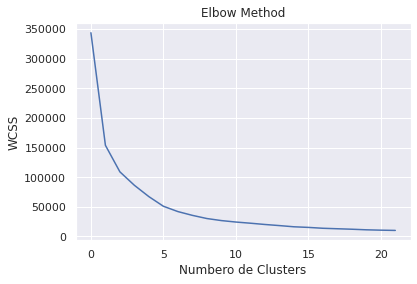

In [ ]:
# Visualizacion de los resultados
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, figure=True)

Se observa cmo empieza alrededor de 3 a decaer, y se comienza a estabilizar a partir de 4 y se vuelve más plano a partir de 12

In [ ]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3


In [ ]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1) 

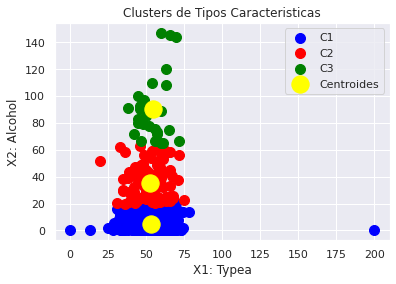

In [428]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
# Con esto se le da color a los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Tipos Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Alcohol')
plt.legend() # Esta es opcional para pintar la leyenda del recuadro
plt.show()

Información que desprende del primer gráfico de Cluster 
Se observa la clusterizacion de las caracteristicas de Alcohol y Typea, en donde el primer cluster C1 es de entre 24 a 76 de typea y de 0 a 20 de alcohol.

El segundo cluster C2 es de entre 26 a 75 de Typea y de 18 a 63 de alcohol.

Lo que corresponde al cluster C3 se situa dentro del rango de entre 40 a 75 en Typea y de entre 60 a 110 en alcohol 

Algoritmo de K-Medias sin Elbow Method

In [ ]:
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1) # fit_predict devuelve para cada punto a que cluster pertenece

#Los cluster que yo creo van a depender de la cantidad que yo especifico, si pongo menos se 
# me readecuan conforme lo que estoy pidiendo. Ojo con la cantidad de iteraciones que hace. 

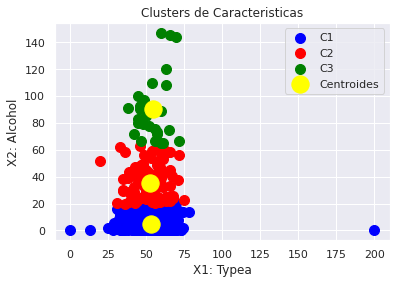

In [ ]:
### Visualizar clusters (se pintan uno a uno)
# Con esto lo que se hace es especificar que se quiere aplicar esto a los puntos del Cluster 1 (index=0), 
# y para la columna 0 (la de los valores de X) y la 1 (la de los valores de y) de esos puntos
# Es decir, en X se tienen dos columnas, se toma la de X (x[0]) y la de y (X[1]) pero aplicado a los puntos de cada cluster 
# (es decir, en vez de todas las filas con [:,] tomo solo las de un cluster [y_label == i])
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
# Para pintar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Alcohol')
plt.legend()
plt.show()

Información que desprende del primer gráfico de Cluster 
Se observa la clusterizacion de las caracteristicas de Alcohol y Typea, en donde el primer cluster C1 es de entre 23 a 77 de typea y de 0 a 20 de alcohol.

El segundo cluster C2 es de entre 26 a 75 de Typea y de 18 a 63 de alcohol.

Lo que corresponde al cluster C3 se situa dentro del rango de entre 40 a 75 en Typea y de entre 60 a 110 en alcohol 

Clusterizacion Jerarquica

In [ ]:
### Dendograma para tener el numero optimo de clusters
# Se va a usar a usar una biblioteca nueva, y con ello busco ver el numero optimo de clusters
import scipy.cluster.hierarchy as sch

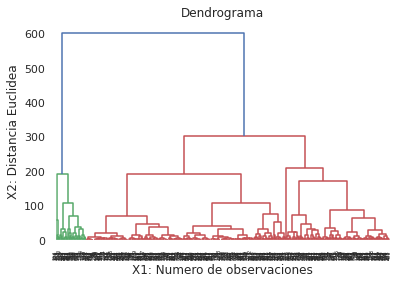

In [ ]:
# Se usa el metodo 'ward' que intenta minimizar la varianza entre clusters. 
# En lugar de minimizar el WC minimal square, se hace con la varianza -> minimizar la varianza en cada cluster
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward')) 
plt.title('Dendrograma')
plt.xlabel('X1: Numero de observaciones')
plt.ylabel('X2: Distancia Euclidea')
plt.show()

In [ ]:
# Entrenar el algoritmo con los datos del conjunto
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1) # Con fit_predict se obtiene el cluster asignado a cada punto

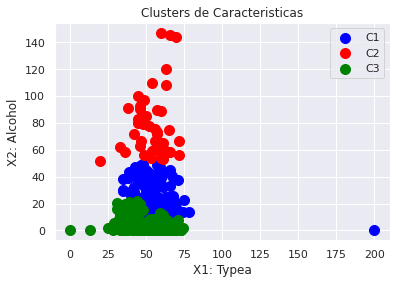

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x1[y_hc == 0, 0], x1[y_hc == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x1[y_hc == 1, 0], x1[y_hc == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x1[y_hc == 2, 0], x1[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')

# Visualizando Grafico en dos dimensiones
plt.title('Clusters de Caracteristicas')
plt.xlabel('X1: Typea')
plt.ylabel('X2: Alcohol')
plt.legend()
plt.show()

Información que desprende del primer gráfico de Cluster 
Se observa la clusterizacion de las caracteristicas de Alcohol y Typea, en donde el primer cluster C1 es de entre 26 a 77 de typea y de 17 a 50 de alcohol.

El segundo cluster C2 es de entre 40 a 75 de Typea y de 50 a 104 de alcohol.

Lo que corresponde al cluster C3 es de entre 24 a 75 de Typea y de 0 a 22 de alcohol. 

##III Conclusiones y Recomendaciones

**Conclusiones en relación con el trabajo realizado**

Es importante el cuido de la salud, y este dataset pone en evidencia una problemática actual, los problemas cardiovasculares, sin embargo un infarto puede ser producto de alguna otra afectación “fantasma” que puede presentar o no algunos síntomas, hasta terminar en un evento fulminante, y aquellos factores se pueden agravar si se suman conductas o hábitos que incidan en los factores de riesgo.
En este dataset SAHeart, a falta de una característica final en el la que indique que los participantes sufrieron o no un problema o afectación cardiaca, se tomaron las variables que se consideran de mayor peso en incidir en un daño coronario, y se procede a indicar algunos datos de investigaciones.

**La Relación de la SBP systolic blood pressure (Presión Sanguínea Sistólica PAS) y el riesgo cardiovascular o coronario**
La presión arterial SBP tiene una gran relación con problemas cardiovasculares, se puede decir que aquellos que presenten altos valores en este indicador tienen mayor posibilidad de padecer problemas cardiovasculares.
Tal y como lo muestra los estudios
Papel de la presión de pulso, presión arterial sistólica y presión arterial diastólica en la predicción del riesgo cardiovascular. Vol. 130. Núm. 10. páginas 361-365 (Marzo 2008)
Así también “Presión arterial y riesgo cardiovascular” Zapata-Sampedro y Castro Varela Index Enferm vol.18 no.2 Granada abr./jun. 2009
“La PAS, como factor de riesgo independiente y modificable, sino que se le señala como el principal determinante del riesgo cardiovascular en personas mayores de 50 años de edad, y especialmente en ancianos”.
“Los valores de PAS por encima de 140 mmHg pueden elevar considerablemente el riesgo cardiovascular, especialmente en ancianos. Por ese motivo, en caso de objetivarse valores superiores a los citados en personas con más de 50 años de edad, deberá intensificar su actividad educativa para mejorar el control”


**Habito de Fumado y el Riesgo cardiovascular o coronario**
El Tabaquismo es uno de los factores de riesgo más importantes para el desarrollo de la enfermedad cardiovascular, Este riesgo es importante para cualquier grupo etario y es proporcional al número de cigarrillos diarios consumidos y al tiempo de duración de la adicción o exposición (en el caso de los pasivos). Fundación para el Estudio, la prevención y el tratamiento de la enfermedad Vascular Aterosclerótica, Argentina
Según se indica en un estudio realizado en Chile, el tabaquismo es un factor alto para desarrollar un problema cardiaco.
“En Chile, la prevalencia de tabaquismo en mayores de 15 años es 40,6%. El tabaquismo activo y pasivo provoca enfermedad cardiovascular como consecuencia del efecto del monóxido de carbono y nicotina a través de inducción de un estado de hipercoagulación, aumento del trabajo cardíaco, vasoconstricción coronaria, liberación de catecolaminas, alteración del metabolismo de los lípidos y alteración de la función endotelial.”
Lanas  y Serón  Rol del tabaquismo en el riesgo cardiovascular global Vol. 23. Núm. 6. Tema central: Riesgo cardiovascular páginas 699-705 (Noviembre 2012)

**Colesterol-LDL elevado y el Riesgo cardiovascular o coronario**
Colesterol-LDL elevado se asocia con un riesgo aumentado de enfermedad cardiovascular, tal y como lo indica Briceño y Acquatella (2017)
El colesterol elevado es uno de los factores de riesgo cardiovascular modificable más importante junto con las modificaciones del estilo de vida. Los tratamientos farmacológicos han demostrado reducir la incidencia de la enfermedad cardiovascular y la mortalidad relacionada. El riesgo de enfermedad cardiovascular se incrementa a mayores cifras de LDL-colesterol, y a mayor número de factores de riesgo para enfermedad cardiovascular.
Nuevas Guías para el tratamiento de los aumentos de colesterol. Riesgos versus metas. Gac Méd Caracas. vol.125 no.4 Caracas dic. 2017

**Type A Behavior Pattern y el Riesgo cardiovascular o coronario**

Tal y como se menciona en investigaciones realizadas, el comportamiento de tipo A, ante las condiciones de estrés, se configura como uno de los factores que puede desencadenar en problemas cardiacos.
“El patrón de comportamiento tipo A (TABP) fue descrito en la década de 1950 por los cardiólogos Meyer Friedman y Ray Rosenman, quienes argumentaron que TABP era un factor de riesgo importante para la enfermedad coronaria.”
“EL PATRÓN DE COMPORTAMIENTO TIPO A (TABP): típicamente caracterizado por individuos que son altamente competitivos, ambiciosos, impulsados por el trabajo, conscientes del tiempo y agresivos”
Type A Behavior Pattern and Coronary Heart Disease: Philip Morris’s “Crown Jewel” Am J Public Health. 2012 November; 102(11): 2018–2025. Published online 2012  November. doi: 10.2105/AJPH.2012.300816

Un estudio longitudinal llevado a cabo por Ragland y Brand (1988) encontró que, como predijo Friedman, los hombres de tipo A tenían más probabilidades de sufrir una enfermedad coronaria. Curiosamente, sin embargo, en un seguimiento de su estudio, encontraron que de los hombres que sobrevivieron a eventos coronarios, los hombres de tipo A murieron a una tasa mucho más baja que los hombres de tipo B.    simplypsychology.org/personality-a.html



Caracteristicas del Dataset SAheart: South African Hearth Disease

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.326840,20.496317,101.00,124.0000,134.00,148.0000,218.00
tobacco,462.0,3.625758,4.591996,0.00,0.0525,2.00,5.4750,31.20
ldl,462.0,4.740325,2.070909,0.98,3.2825,4.34,5.7900,15.33
adiposity,462.0,25.407792,7.772588,6.74,19.7750,26.13,31.0250,42.49
famhist,462.0,0.409091,0.492199,0.00,0.0000,0.00,1.0000,1.00
typea,462.0,53.337662,12.078137,0.00,47.0000,53.00,60.0000,200.00
obesity,462.0,26.064026,4.201118,14.70,23.1125,25.83,28.4975,46.58
alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.51,23.8925,147.19
age,462.0,42.816017,14.608956,15.00,31.0000,45.00,55.0000,64.00


##Resumen de Resultados

Según los datos procesados se pudo observar que  existe una correlasion positiva fuerte entre Adiposity vs obesity - Obesity vs Adiposity y Age vs Adiposity - Adiposity vs Age. Por lo tanto quienes presentan un mayor nivel de obesidad son aquellos con mayor edad, de igual forma quienes presentaban mayor nivel de consumo de tabaco acumulado son aquellos con mayor edad, y por ultimo quienes presenten un nivel alto de adiposity presentarán un nievel alto de obessidad.

La muestra de las personas corresponde a un grupo masculino con edades entre los 15 a 64 años, siendo la edad que más se repite 16 años.

Ademas que aquellos que no tienen historial familiar
de enfermedad cardiaca (famhist) tienden a fumar un poco más que aquellos que sí presentan un historial familiar de enfermedad cardiaca

Correlaciones de las Caracteristicas

In [ ]:
data.corr()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
sbp,1.000000,0.210506,0.158296,0.357041,0.082187,-0.065867,0.235954,0.140096,0.388771
tobacco,0.210506,1.000000,0.159547,0.284931,0.095439,-0.029719,0.120212,0.197920,0.447488
ldl,0.158296,0.159547,1.000000,0.435795,0.161713,0.011956,0.327483,-0.033403,0.311799
adiposity,0.357041,0.284931,0.435795,1.000000,0.167432,-0.053445,0.713895,0.099671,0.627708
famhist,0.082187,0.095439,0.161713,0.167432,1.000000,0.023054,0.101924,0.063991,0.234936
typea,-0.065867,-0.029719,0.011956,-0.053445,0.023054,1.000000,0.064854,0.015280,-0.128017
obesity,0.235954,0.120212,0.327483,0.713895,0.101924,0.064854,1.000000,0.048467,0.289121
alcohol,0.140096,0.197920,-0.033403,0.099671,0.063991,0.015280,0.048467,1.000000,0.101125
age,0.388771,0.447488,0.311799,0.627708,0.234936,-0.128017,0.289121,0.101125,1.000000


Resumen de Gráfica de Dispersión

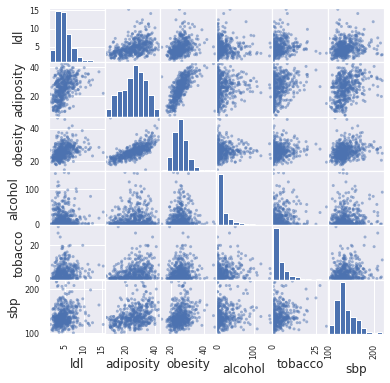

In [ ]:
scatter_matrix((data[['ldl',"adiposity","obesity",'alcohol','tobacco','sbp']]),figsize = (6, 6));

Se observa una correlación positva entre la caracteristica tobacco y age, siendo que las personas de mayor edad tienen posiblemente un habito más pronunciado de fumado por ende un acumulativo de cantidad de cigarrillos mayor.

Se observa una correlacion positiva entre la caracteristica age y la caracteristica adiposity si aumenta age la caracteristica adiposity aumenta

##Recomendaciones

La investigación es de gran importancia para el avance en el control y prevención de enfermedad cardiovascular, sin embargo sería interesante ampliar el estudio con una muestra femenina y así comparar los resultados entre las poblaciones.

Además el estudio se realizó en Sudafrica en población masculina directamente de la etnia blanca, tambian podría ampliarse el estudio a otro grupo etnico (negros, asiaticos, latinos) para determinar si existe alguan incidencia de un grupo etnico o no, en relación a la posibilidad de desarrollar daño cardiaco.